In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 数据分析要求

### 数据摘要和可视化

#### - 数据摘要
      
      1. 标称属性，给出每个可能取值的频数
      
      2. 数值属性，给出5数概括及缺失值的个数
      
#### - 数据可视化

      使用直方图、盒图等检查数据分布及离群点
      
### 数据缺失的处理

#### 观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

#### - 将缺失部分剔除
    
#### - 用最高频率值来填补缺失值
    
#### - 通过属性的相关关系来填补缺失值
    
#### - 通过数据对象之间的相似性来填补缺失值  (拟使用热卡填充法, i.e. Hot Deck Imputation)

&nbsp;

### ***注意：在处理后完成，要对比新旧数据集的差异。***

## 1. Data Details

### Columns

`repositories` - the name of the repository (Format - github_username/repository_name)

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`issues_count` - active/opened issues in the repository

`pull_requests` - pull requests opened in the repository

`contributors` - contributors contribute to the project so far

`language` - primary language used in the project

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set. 
# TODO Please change to your own local path 
github_data = pd.read_csv(r'C:\Users\张睿堃\Desktop\数据挖掘\作业\第三周\dataset_github\github_dataset.csv')    # 转义字符

# Check the columns.
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [51]:
# Show first five rows as an example.
github_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


### Nominal Attributes

`repositories` - the name of the repository (Format - github_username/repository_name)

`language` - primary language used in the project

#### *Frequency -- `repositories`*

In [3]:
github_data['repositories'].value_counts()

repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: count, Length: 972, dtype: int64

#### *Frequency -- `language`*

In [4]:
github_data['language'].value_counts()

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

### Numeric Attributes

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`issues_count` - active/opened issues in the repository

`pull_requests` - pull requests opened in the repository

`contributors` - contributors contribute to the project so far

In [5]:
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors'])
numeric_github_data.head()

,stars_count,forks_count,issues_count,pull_requests,contributors
0,0,0,612,316,2
1,271,150,536,6,71
2,0,0,313,27,154
3,0,0,290,30,434
4,0,589,202,22,67


In [6]:
github_data['stars_count'].describe()

count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

In [7]:
numeric_describe = numeric_github_data.describe()
numeric_describe

,stars_count,forks_count,issues_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,81.976236,53.884981,8.656844,4.374525,8.364068
std,170.403116,127.699729,32.445154,27.913732,37.511807
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


#### *Five Number Summary -- `stars_count`, `forks_count`, `issues_count`, `pull_requests`, `contributors`*

In [8]:
numeric_describe.loc[['mean', '25%', '50%', '75%', 'max']]

,stars_count,forks_count,issues_count,pull_requests,contributors
mean,81.976236,53.884981,8.656844,4.374525,8.364068
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


#### *Missing Value Count*

In [9]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


## 2. Data Visualization

### Histogram for Nominal Attributes

#### `repositories`

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
repo_counts = pd.DataFrame(github_data['repositories'].value_counts())
repo_counts

,count
repositories,
kameshsampath/ansible-role-rosa-demos,2
aloisdeniel/bluff,2
antoniaandreou/github-slideshow,2
jgthms/bulma-start,2
artkirienko/hlds-docker-dproto,2
...,...
WhiteHouse/CIOmanagement,1
0xCaso/defillama-telegram-bot,1
ethereum/blake2b-py,1


In [12]:
repo_counts.index

Index(['kameshsampath/ansible-role-rosa-demos', 'aloisdeniel/bluff',
       'antoniaandreou/github-slideshow', 'jgthms/bulma-start',
       'artkirienko/hlds-docker-dproto', 'artkirienko/int-null-even',
       'KrauseFx/dotfiles', 'carloscuesta/gitmoji', 'divyamagwl/Depocalypse',
       'ritwickdey/Cake-Shop',
       ...
       'trailofbits/circuitous-benchmarks', 'Clueless-Community/Datasets',
       'ethereum/beacon_chain', 'openfoodfacts/eu-food-data',
       'jonfroehlich/jonfroehlich.github.io', 'WhiteHouse/CIOmanagement',
       '0xCaso/defillama-telegram-bot', 'ethereum/blake2b-py',
       'openfoodfacts/folksonomy_mobile_experiment',
       'gamemann/All_PropHealth'],
      dtype='object', name='repositories', length=972)

In [13]:
repo_counts.T

repositories,kameshsampath/ansible-role-rosa-demos,aloisdeniel/bluff,antoniaandreou/github-slideshow,jgthms/bulma-start,artkirienko/hlds-docker-dproto,artkirienko/int-null-even,KrauseFx/dotfiles,carloscuesta/gitmoji,divyamagwl/Depocalypse,ritwickdey/Cake-Shop,...,trailofbits/circuitous-benchmarks,Clueless-Community/Datasets,ethereum/beacon_chain,openfoodfacts/eu-food-data,jonfroehlich/jonfroehlich.github.io,WhiteHouse/CIOmanagement,0xCaso/defillama-telegram-bot,ethereum/blake2b-py,openfoodfacts/folksonomy_mobile_experiment,gamemann/All_PropHealth
count,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [14]:
language_counts = pd.DataFrame(github_data['language'].value_counts()).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})
language_counts

,count
language,
ActionScript,1
Assembly,2
AutoHotkey,3
C,26
C#,8
C++,29
CMake,1
CSS,37
CodeQL,2


In [15]:
language_counts.index

Index(['ActionScript', 'Assembly', 'AutoHotkey', 'C', 'C#', 'C++', 'CMake',
       'CSS', 'CodeQL', 'CoffeeScript', 'Cuda', 'Dart', 'Dockerfile', 'Elixir',
       'Gherkin', 'Go', 'HCL', 'HTML', 'Hack', 'Haskell', 'Java', 'JavaScript',
       'Jinja', 'Jupyter Notebook', 'Kotlin', 'Less', 'Makefile',
       'Objective-C', 'Oz', 'PHP', 'Pawn', 'Perl', 'PowerShell', 'PureBasic',
       'Python', 'QML', 'QMake', 'R', 'Roff', 'Ruby', 'Rust', 'SCSS', 'Shell',
       'Smarty', 'Solidity', 'SourcePawn', 'Svelte', 'Swift', 'TypeScript',
       'Vim Script', 'Vue'],
      dtype='object', name='language')

In [16]:
pd.DataFrame(github_data['language'].value_counts()).T

language,JavaScript,Python,HTML,Java,CSS,TypeScript,Dart,C++,Jupyter Notebook,Ruby,...,ActionScript,Roff,HCL,R,PureBasic,Smarty,Less,Svelte,Haskell,SourcePawn
count,253,155,72,44,37,37,36,29,29,28,...,1,1,1,1,1,1,1,1,1,1


<BarContainer object of 51 artists>

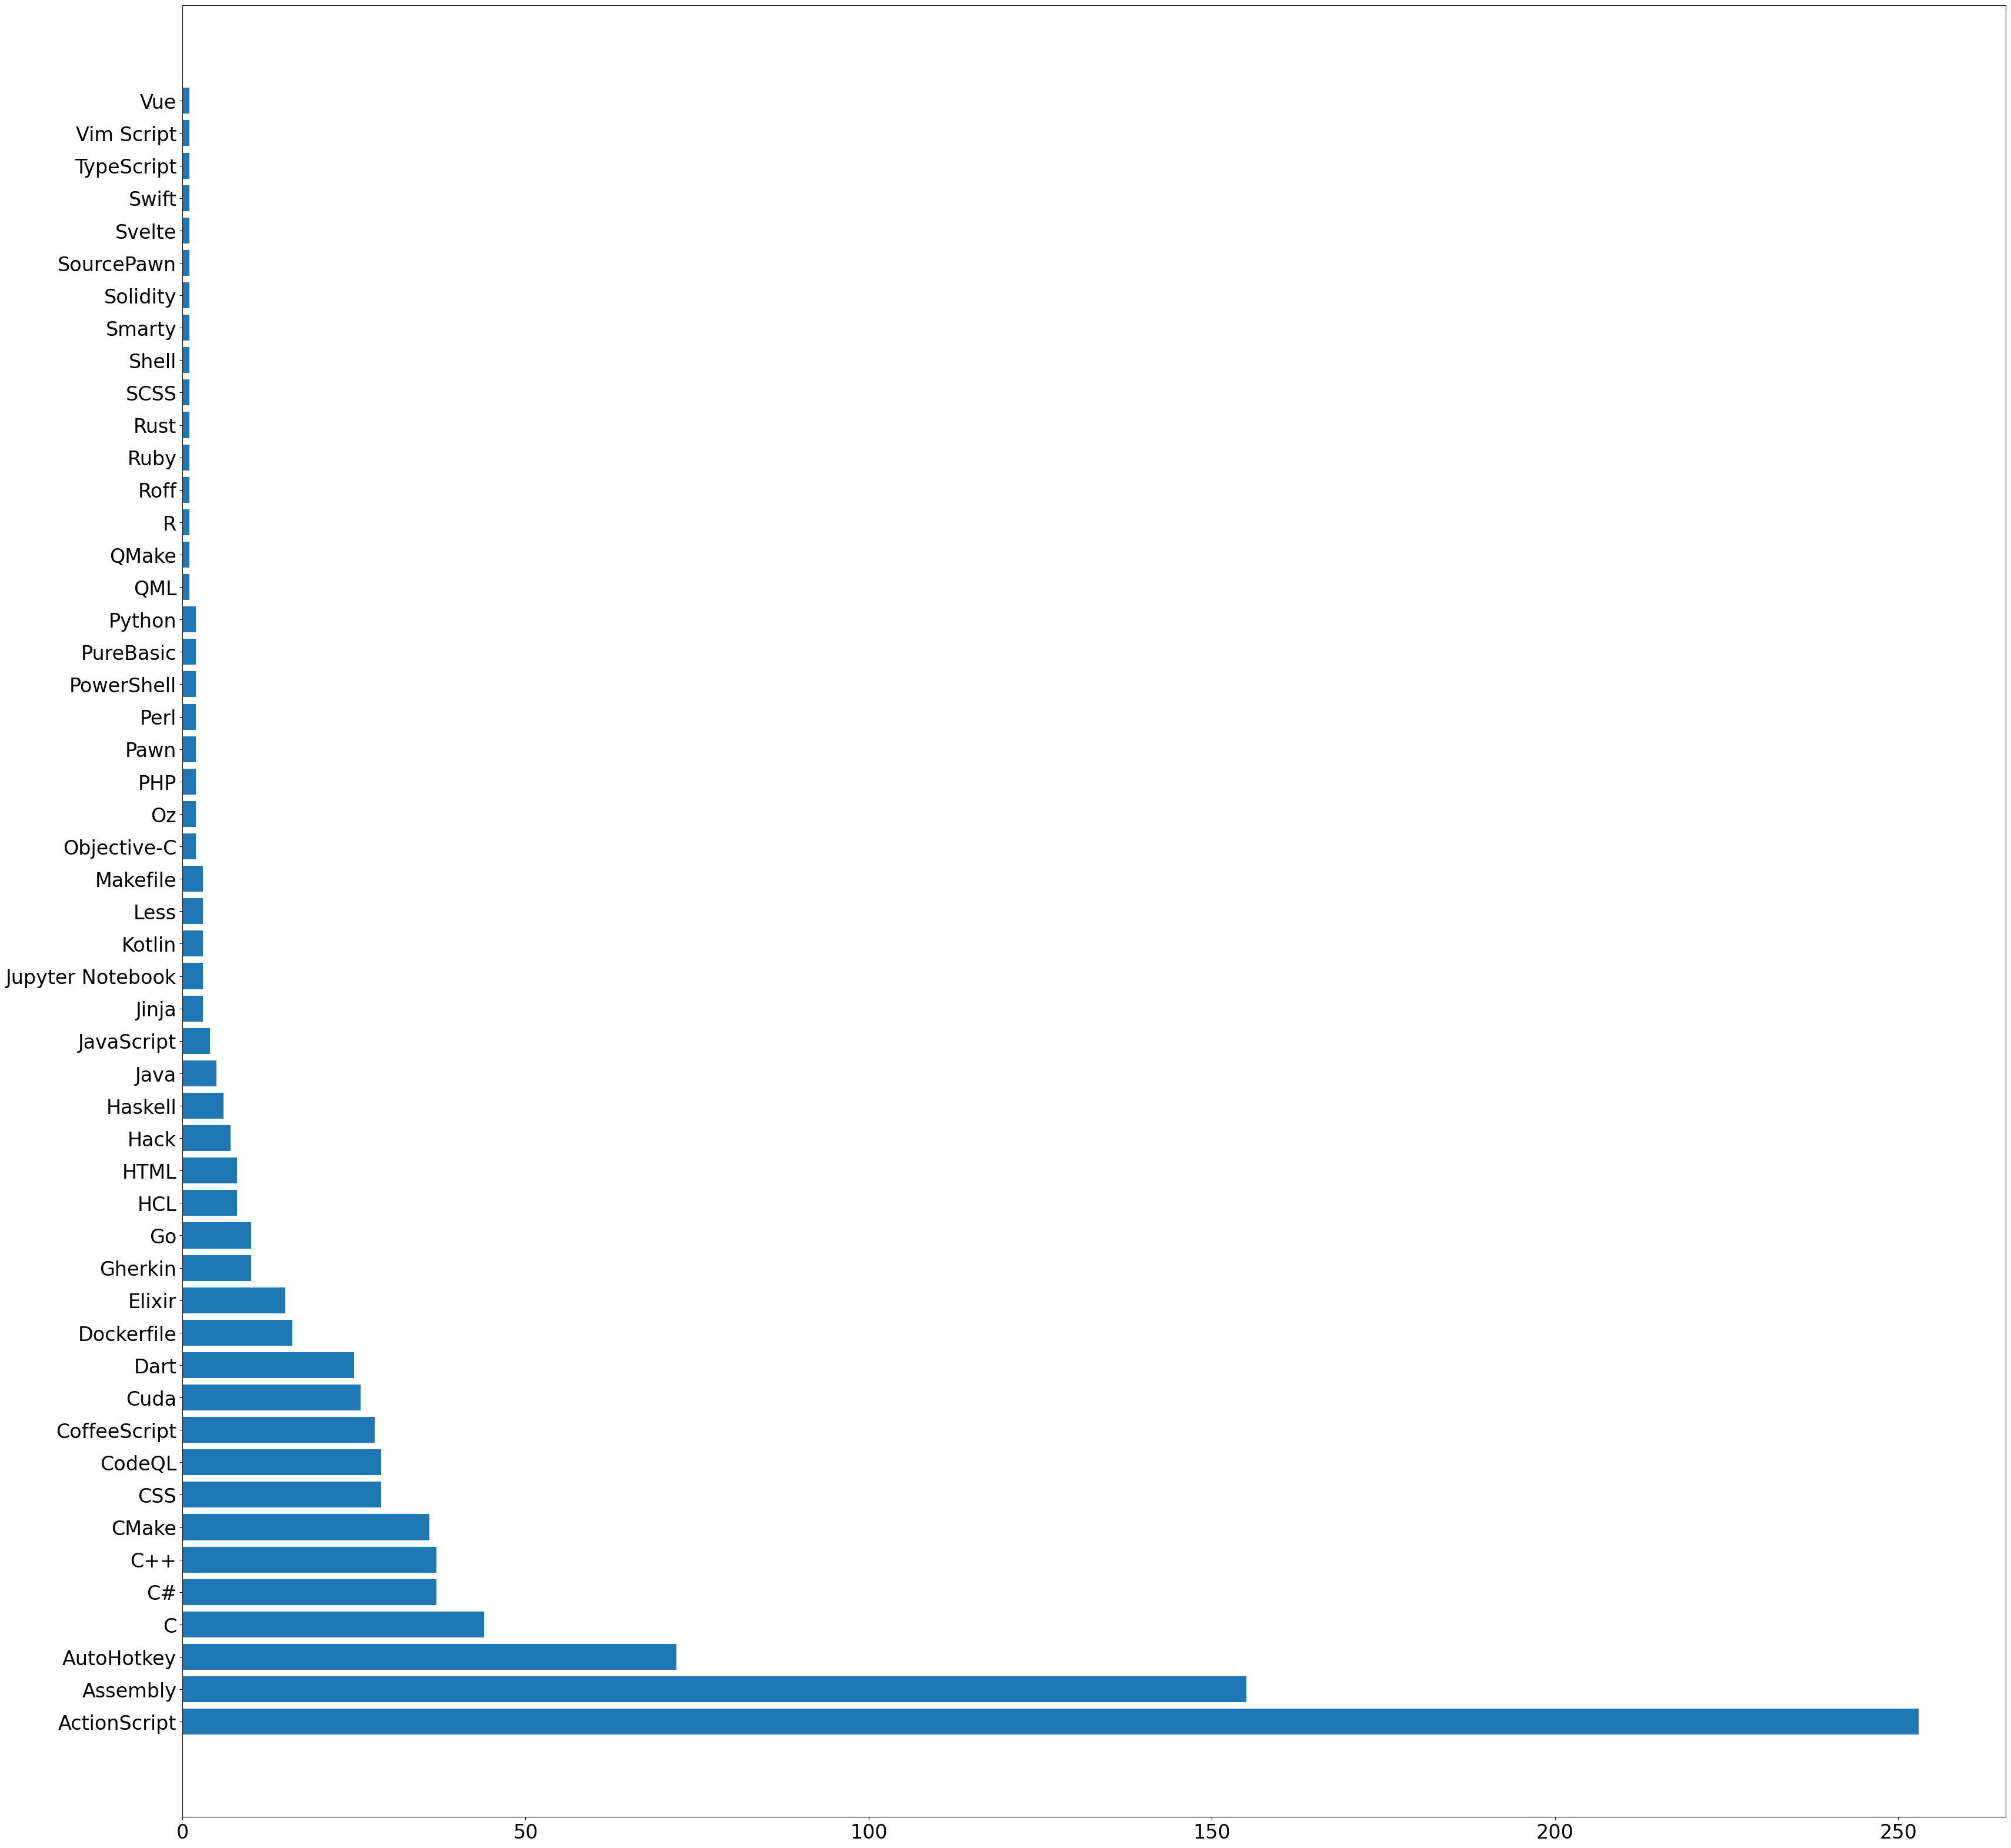

In [17]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=github_data['language'].value_counts())

In [18]:
language_list = [np.nan]
encode_language_list = []
nan = np.nan
for language in github_data['language']:
    if language not in language_list:
        language_list.append(language)
    language = language_list.index(language)
encode_language_list.append(language)
print(language_list)
print(len(language_list))

[nan, 'C++', 'Python', 'Ruby', 'Java', 'CSS', 'Jinja', 'Dart', 'JavaScript', 'HTML', 'Objective-C', 'Kotlin', 'AutoHotkey', 'Go', 'Haskell', 'SCSS', 'Jupyter Notebook', 'Vue', 'Shell', 'Rust', 'PowerShell', 'C', 'C#', 'TypeScript', 'Svelte', 'Less', 'QML', 'CoffeeScript', 'Swift', 'Hack', 'PHP', 'Smarty', 'Solidity', 'Dockerfile', 'PureBasic', 'Vim Script', 'R', 'HCL', 'Perl', 'Makefile', 'Roff', 'ActionScript', 'CodeQL', 'Elixir', 'Oz', 'CMake', 'Assembly', 'Pawn', 'Gherkin', 'QMake', 'Cuda', 'SourcePawn']
52


In [20]:
# github_data_encoded = github_data.insert(loc=len(github_data.columns), column='language_encoded', value=[l for l in encode_language_list])

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\1949142607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket', showfliers=False)


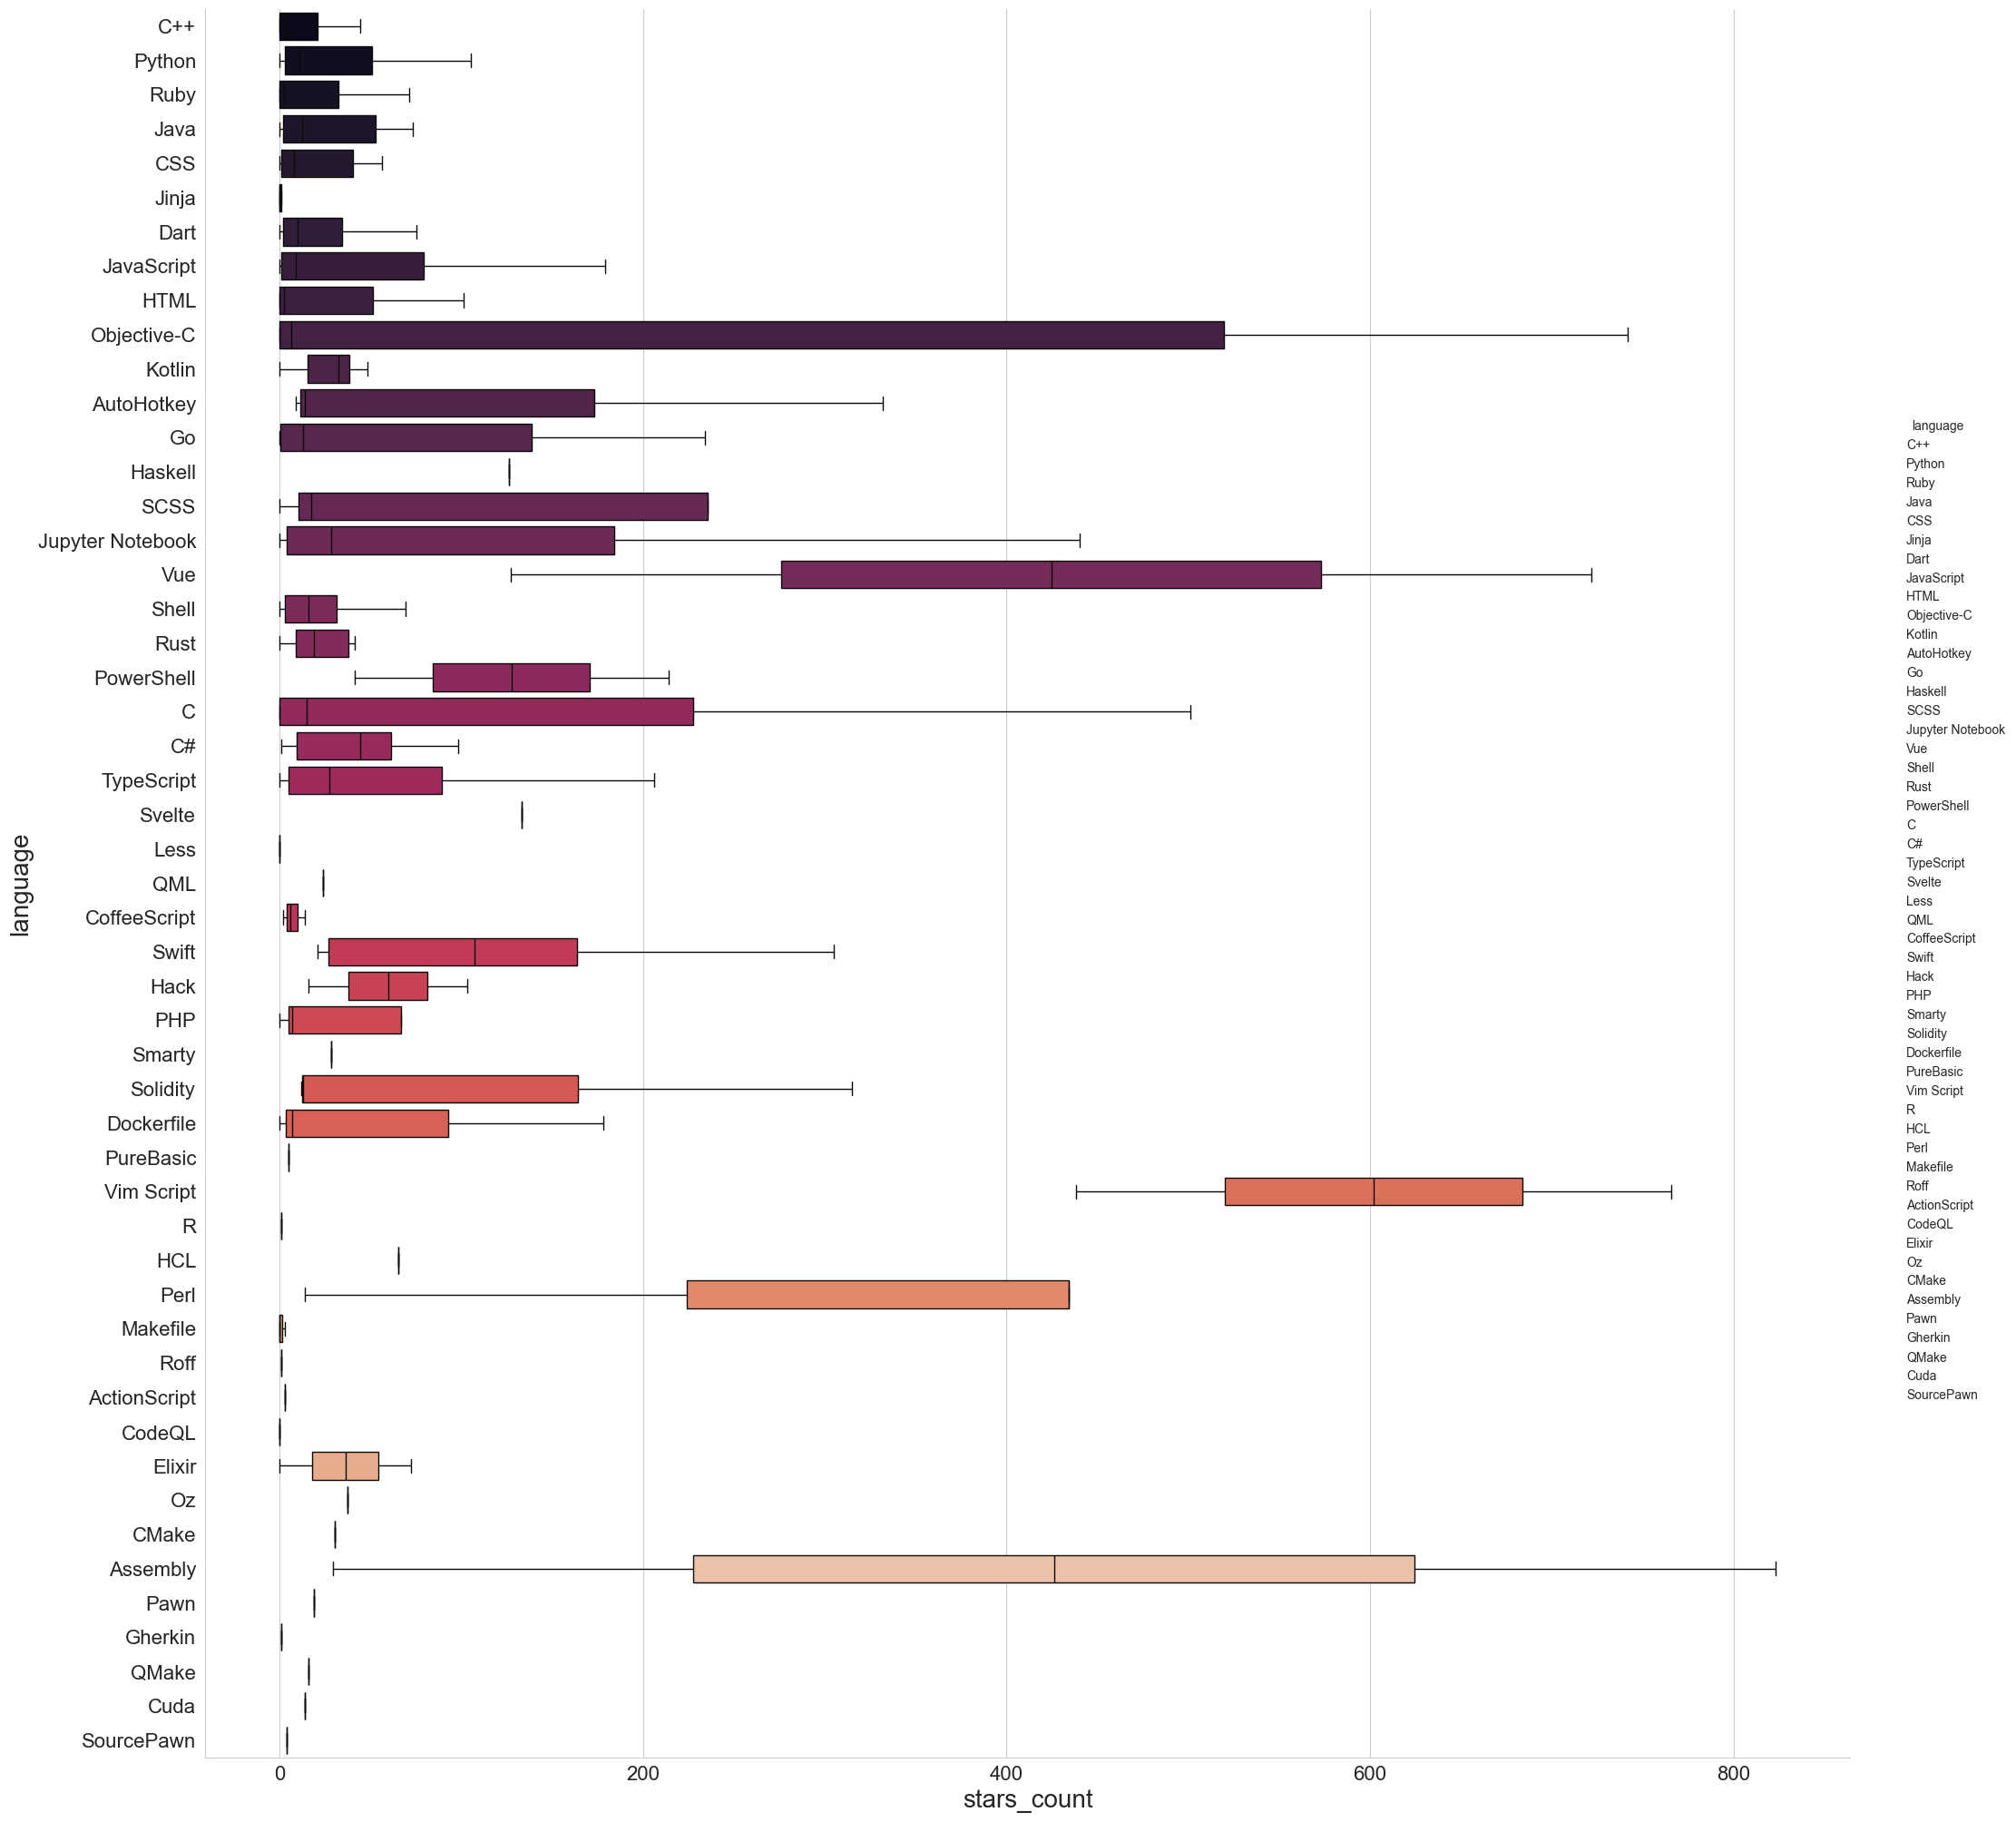

In [21]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\313259823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket', showfliers=False)


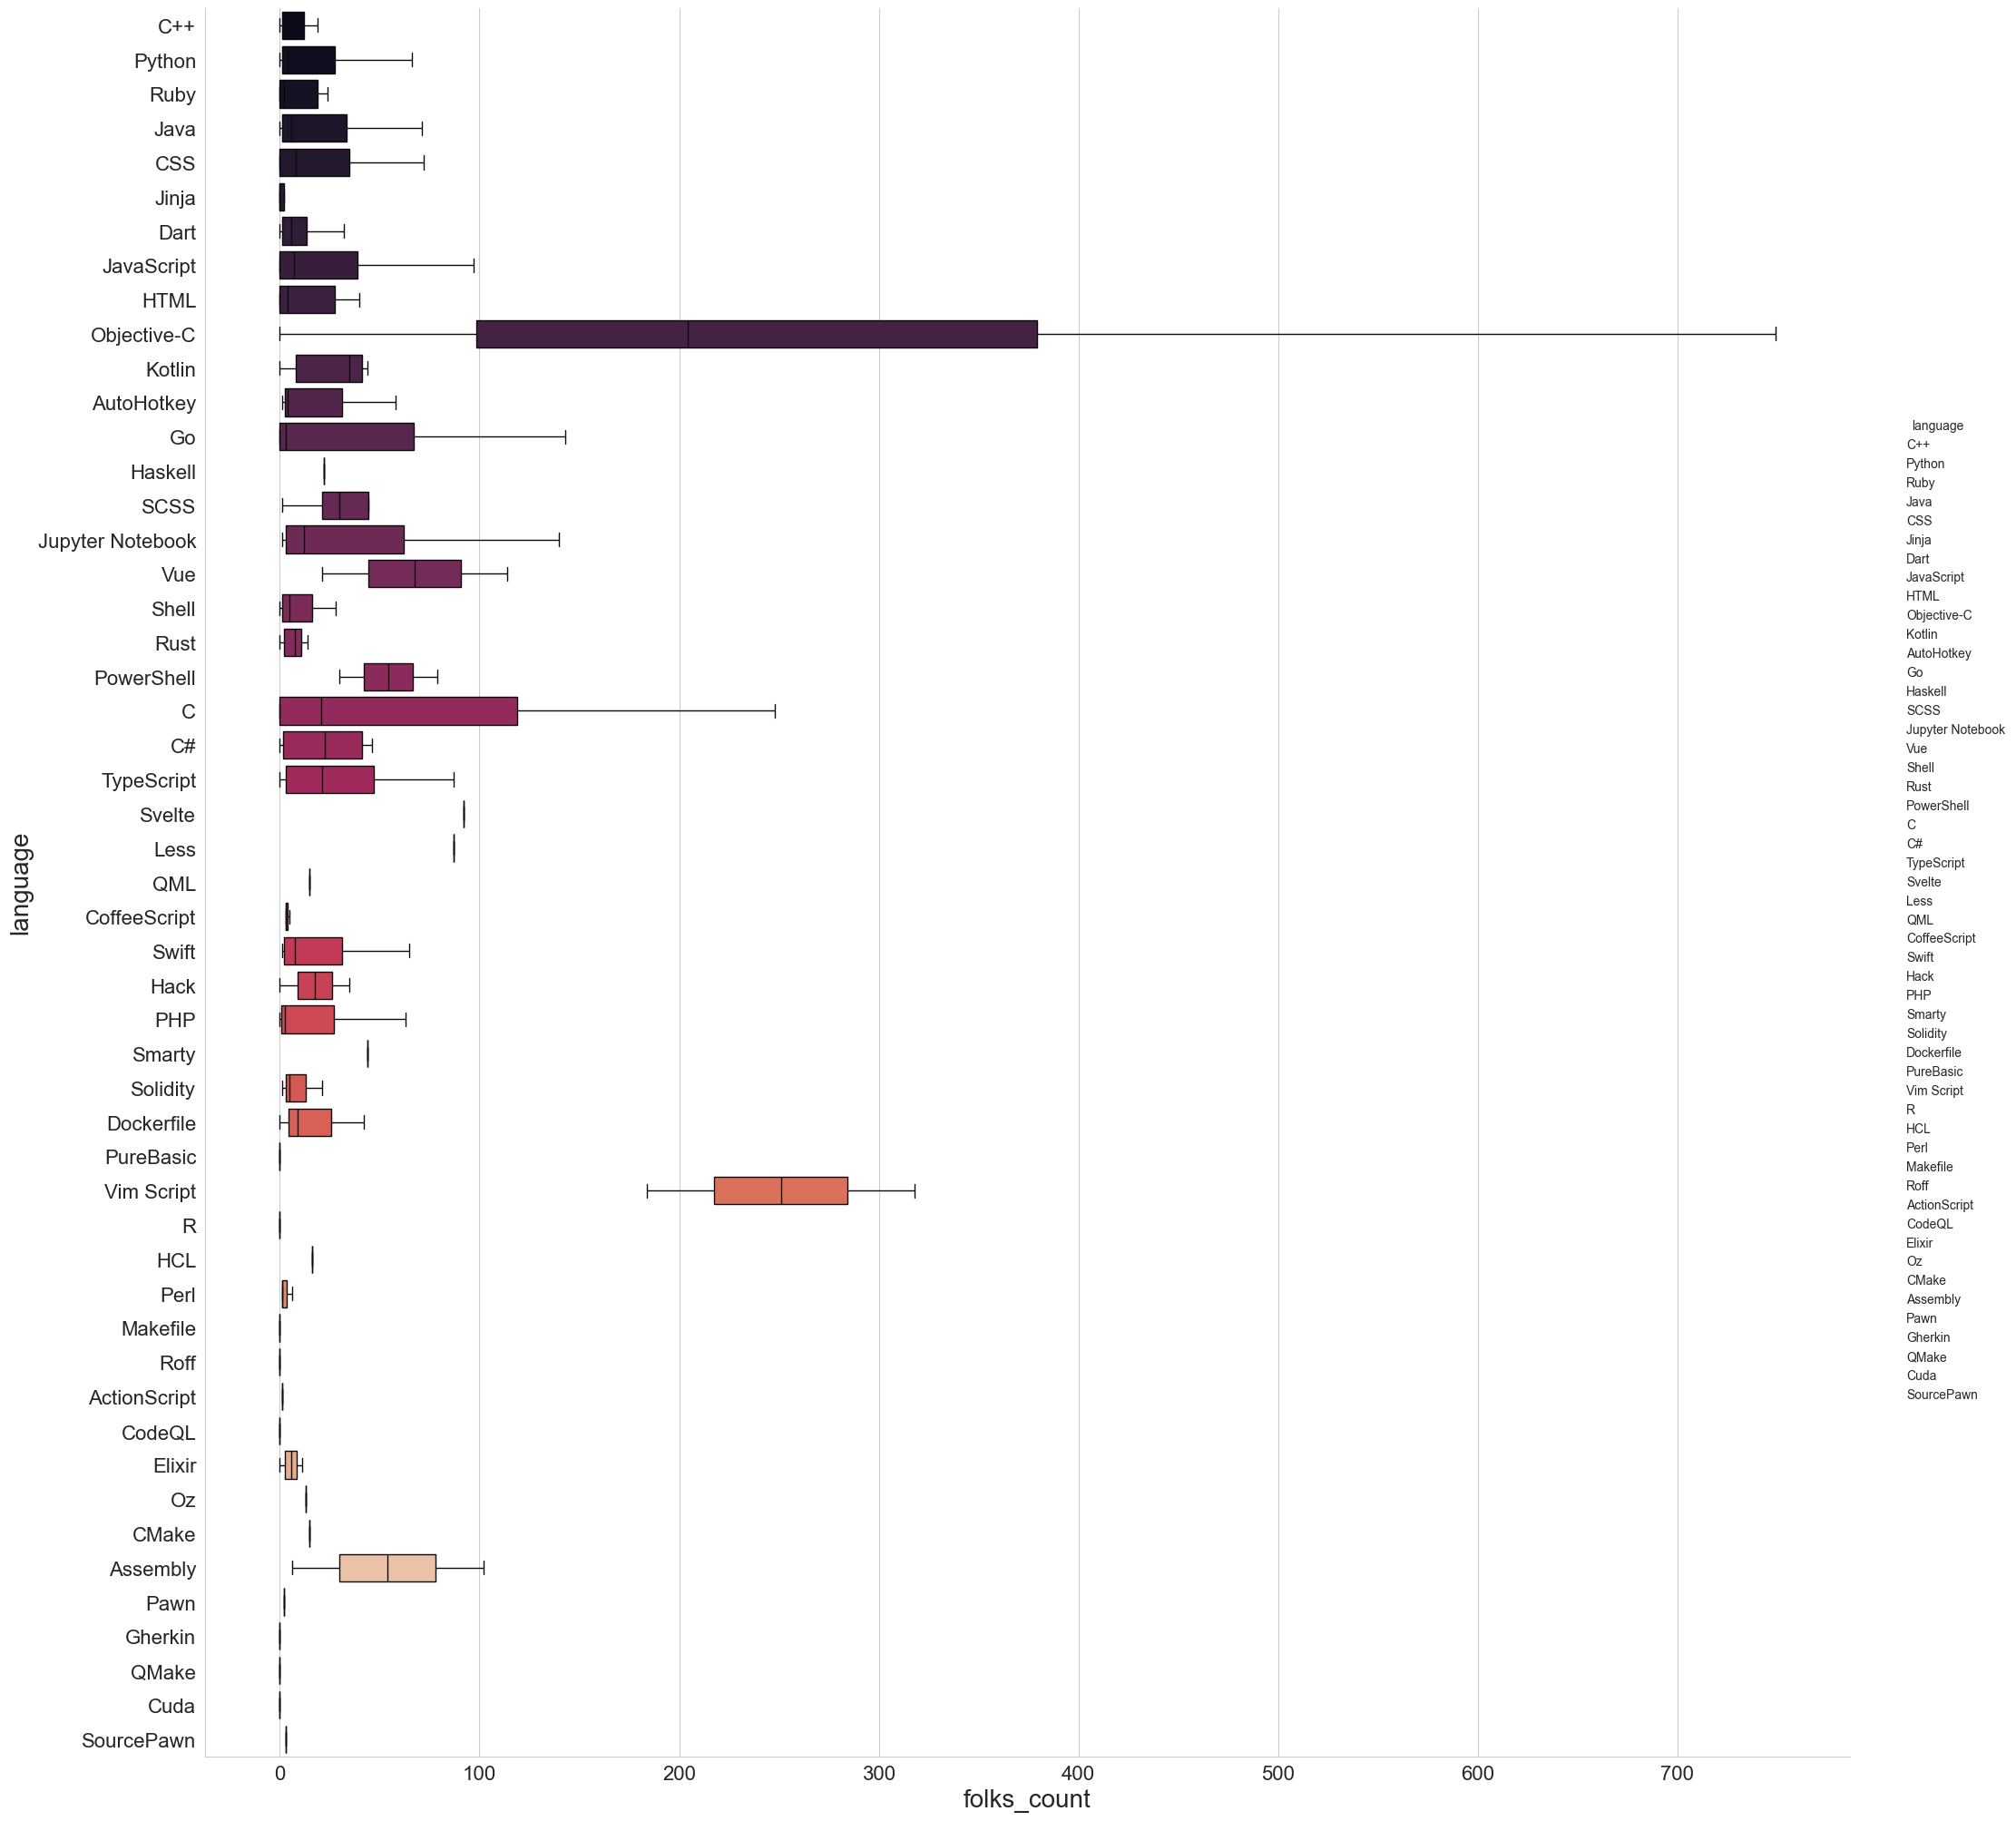

In [22]:
sns.set_style("whitegrid")
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('folks_count', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\1332106939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket', showfliers=False)


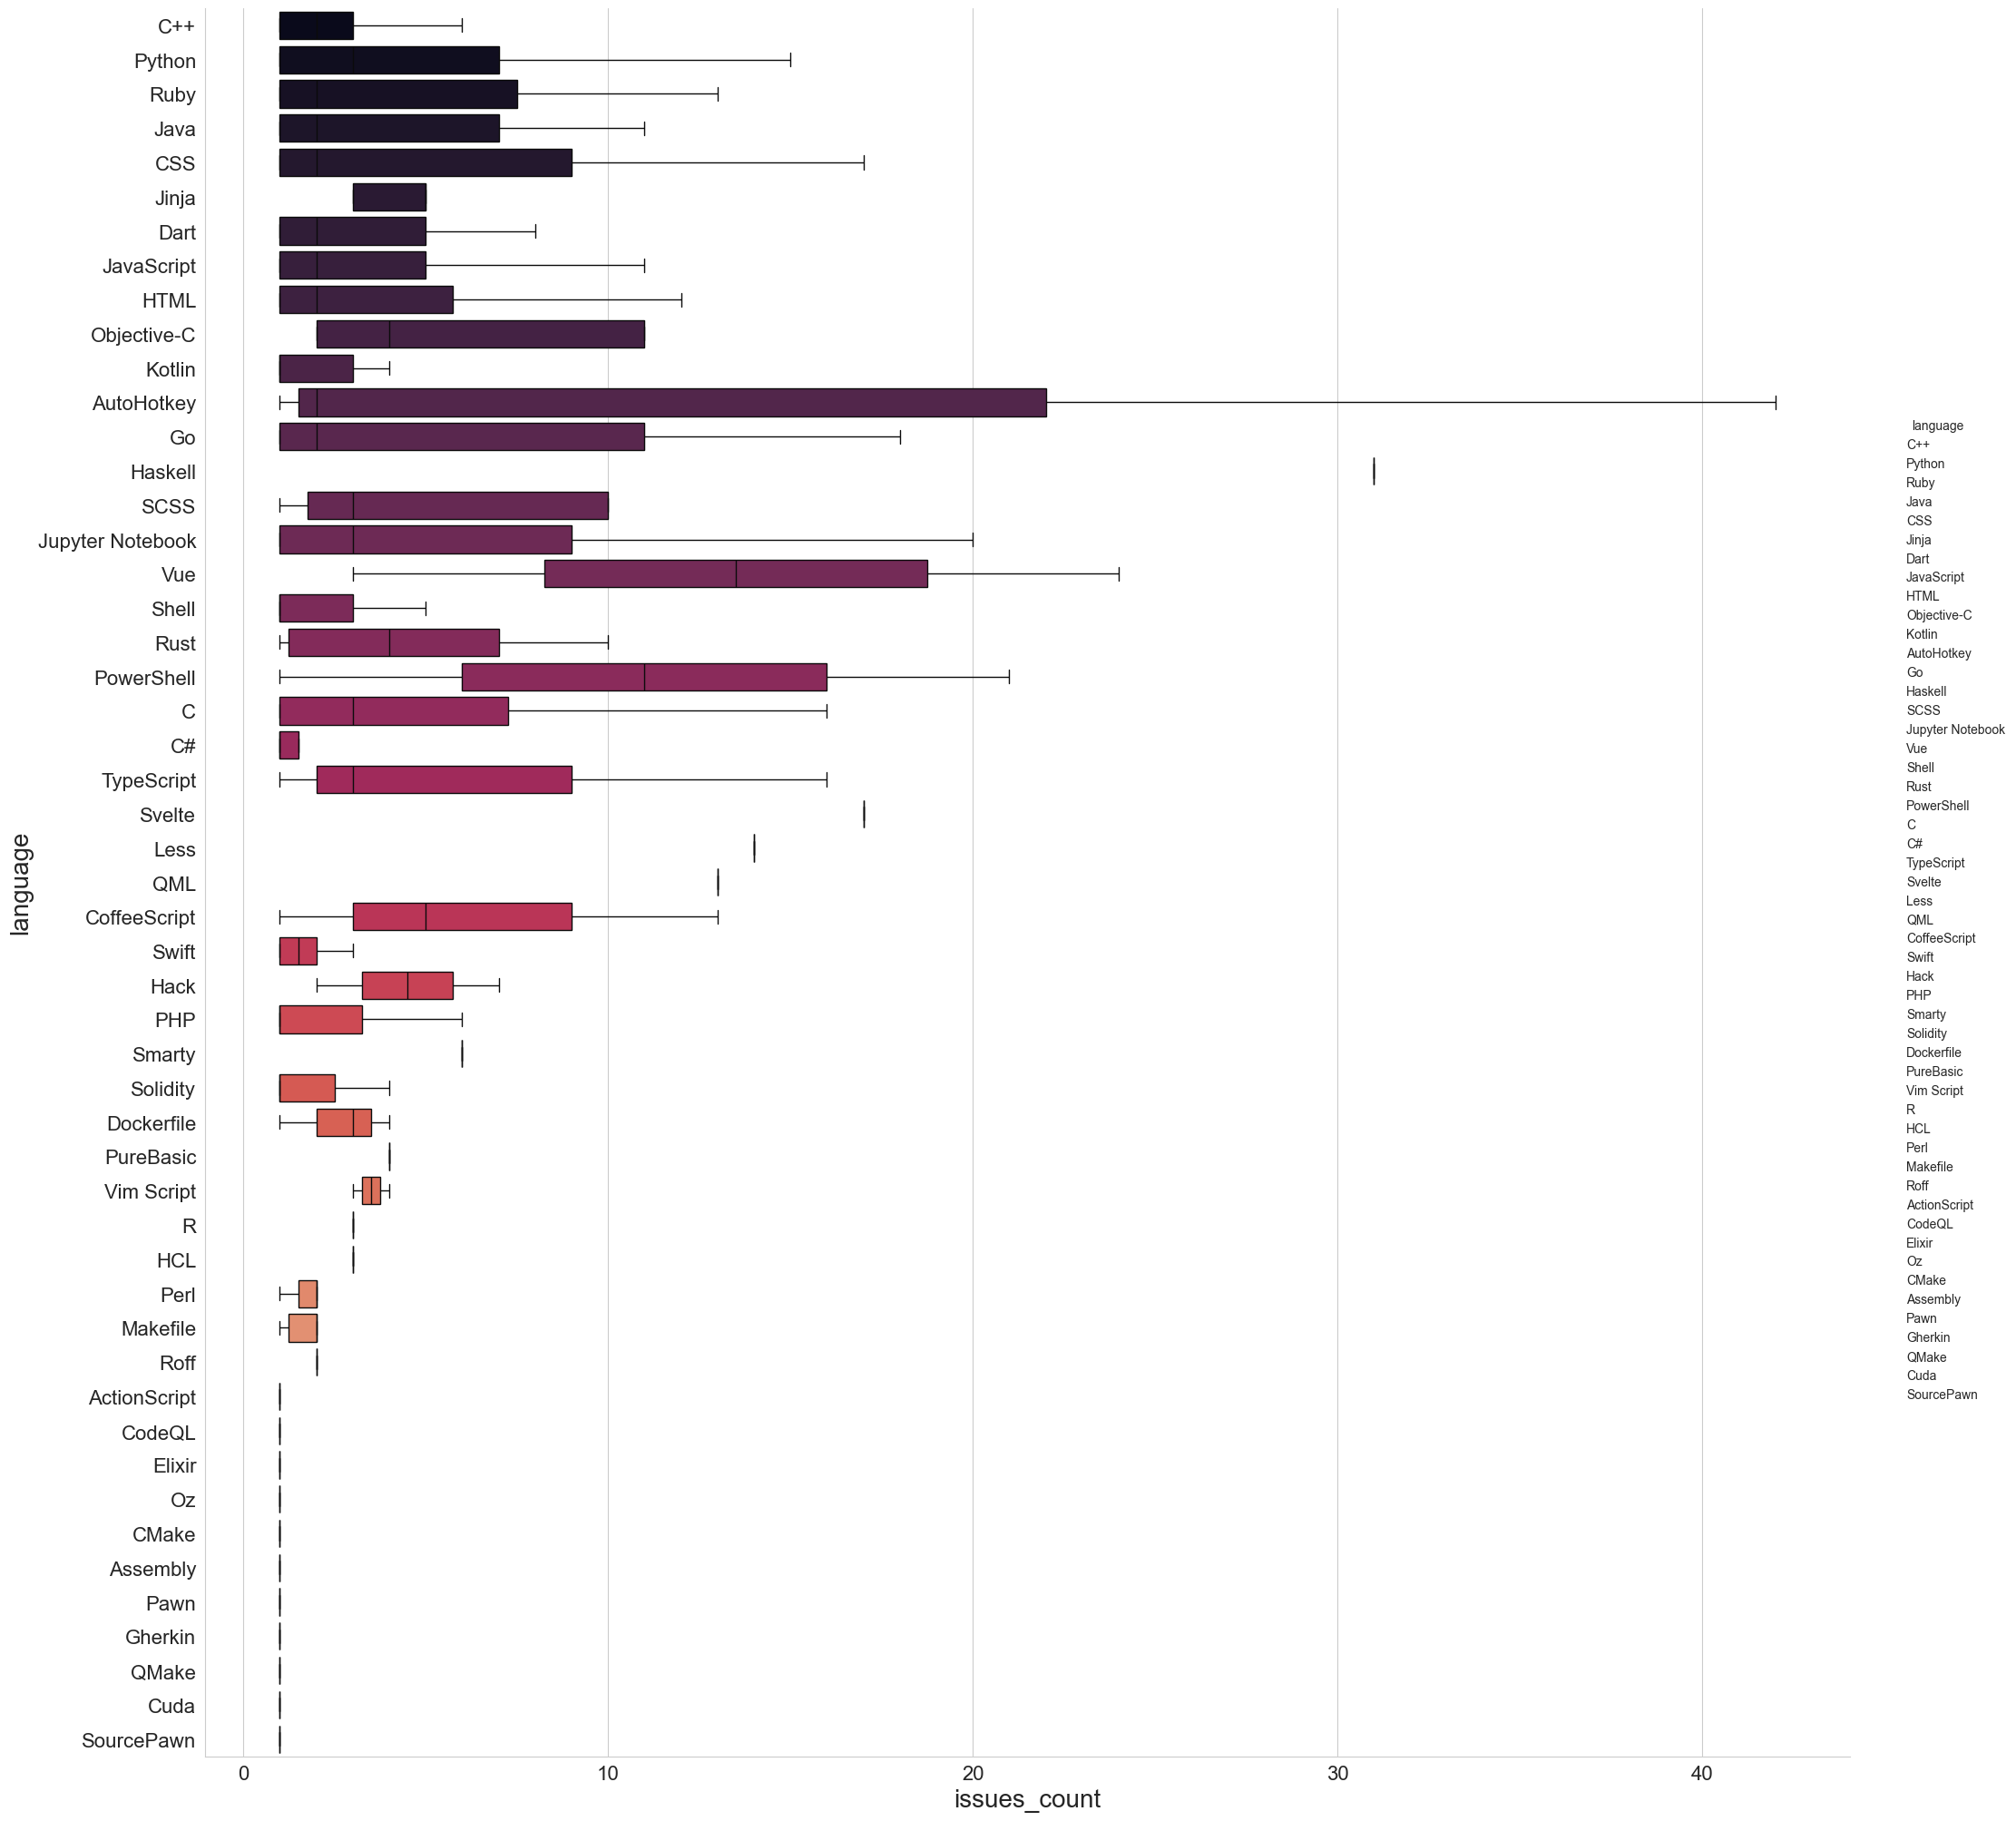

In [23]:
sns.set_style("whitegrid")
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('issues_count', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\1223950893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', showfliers=False)


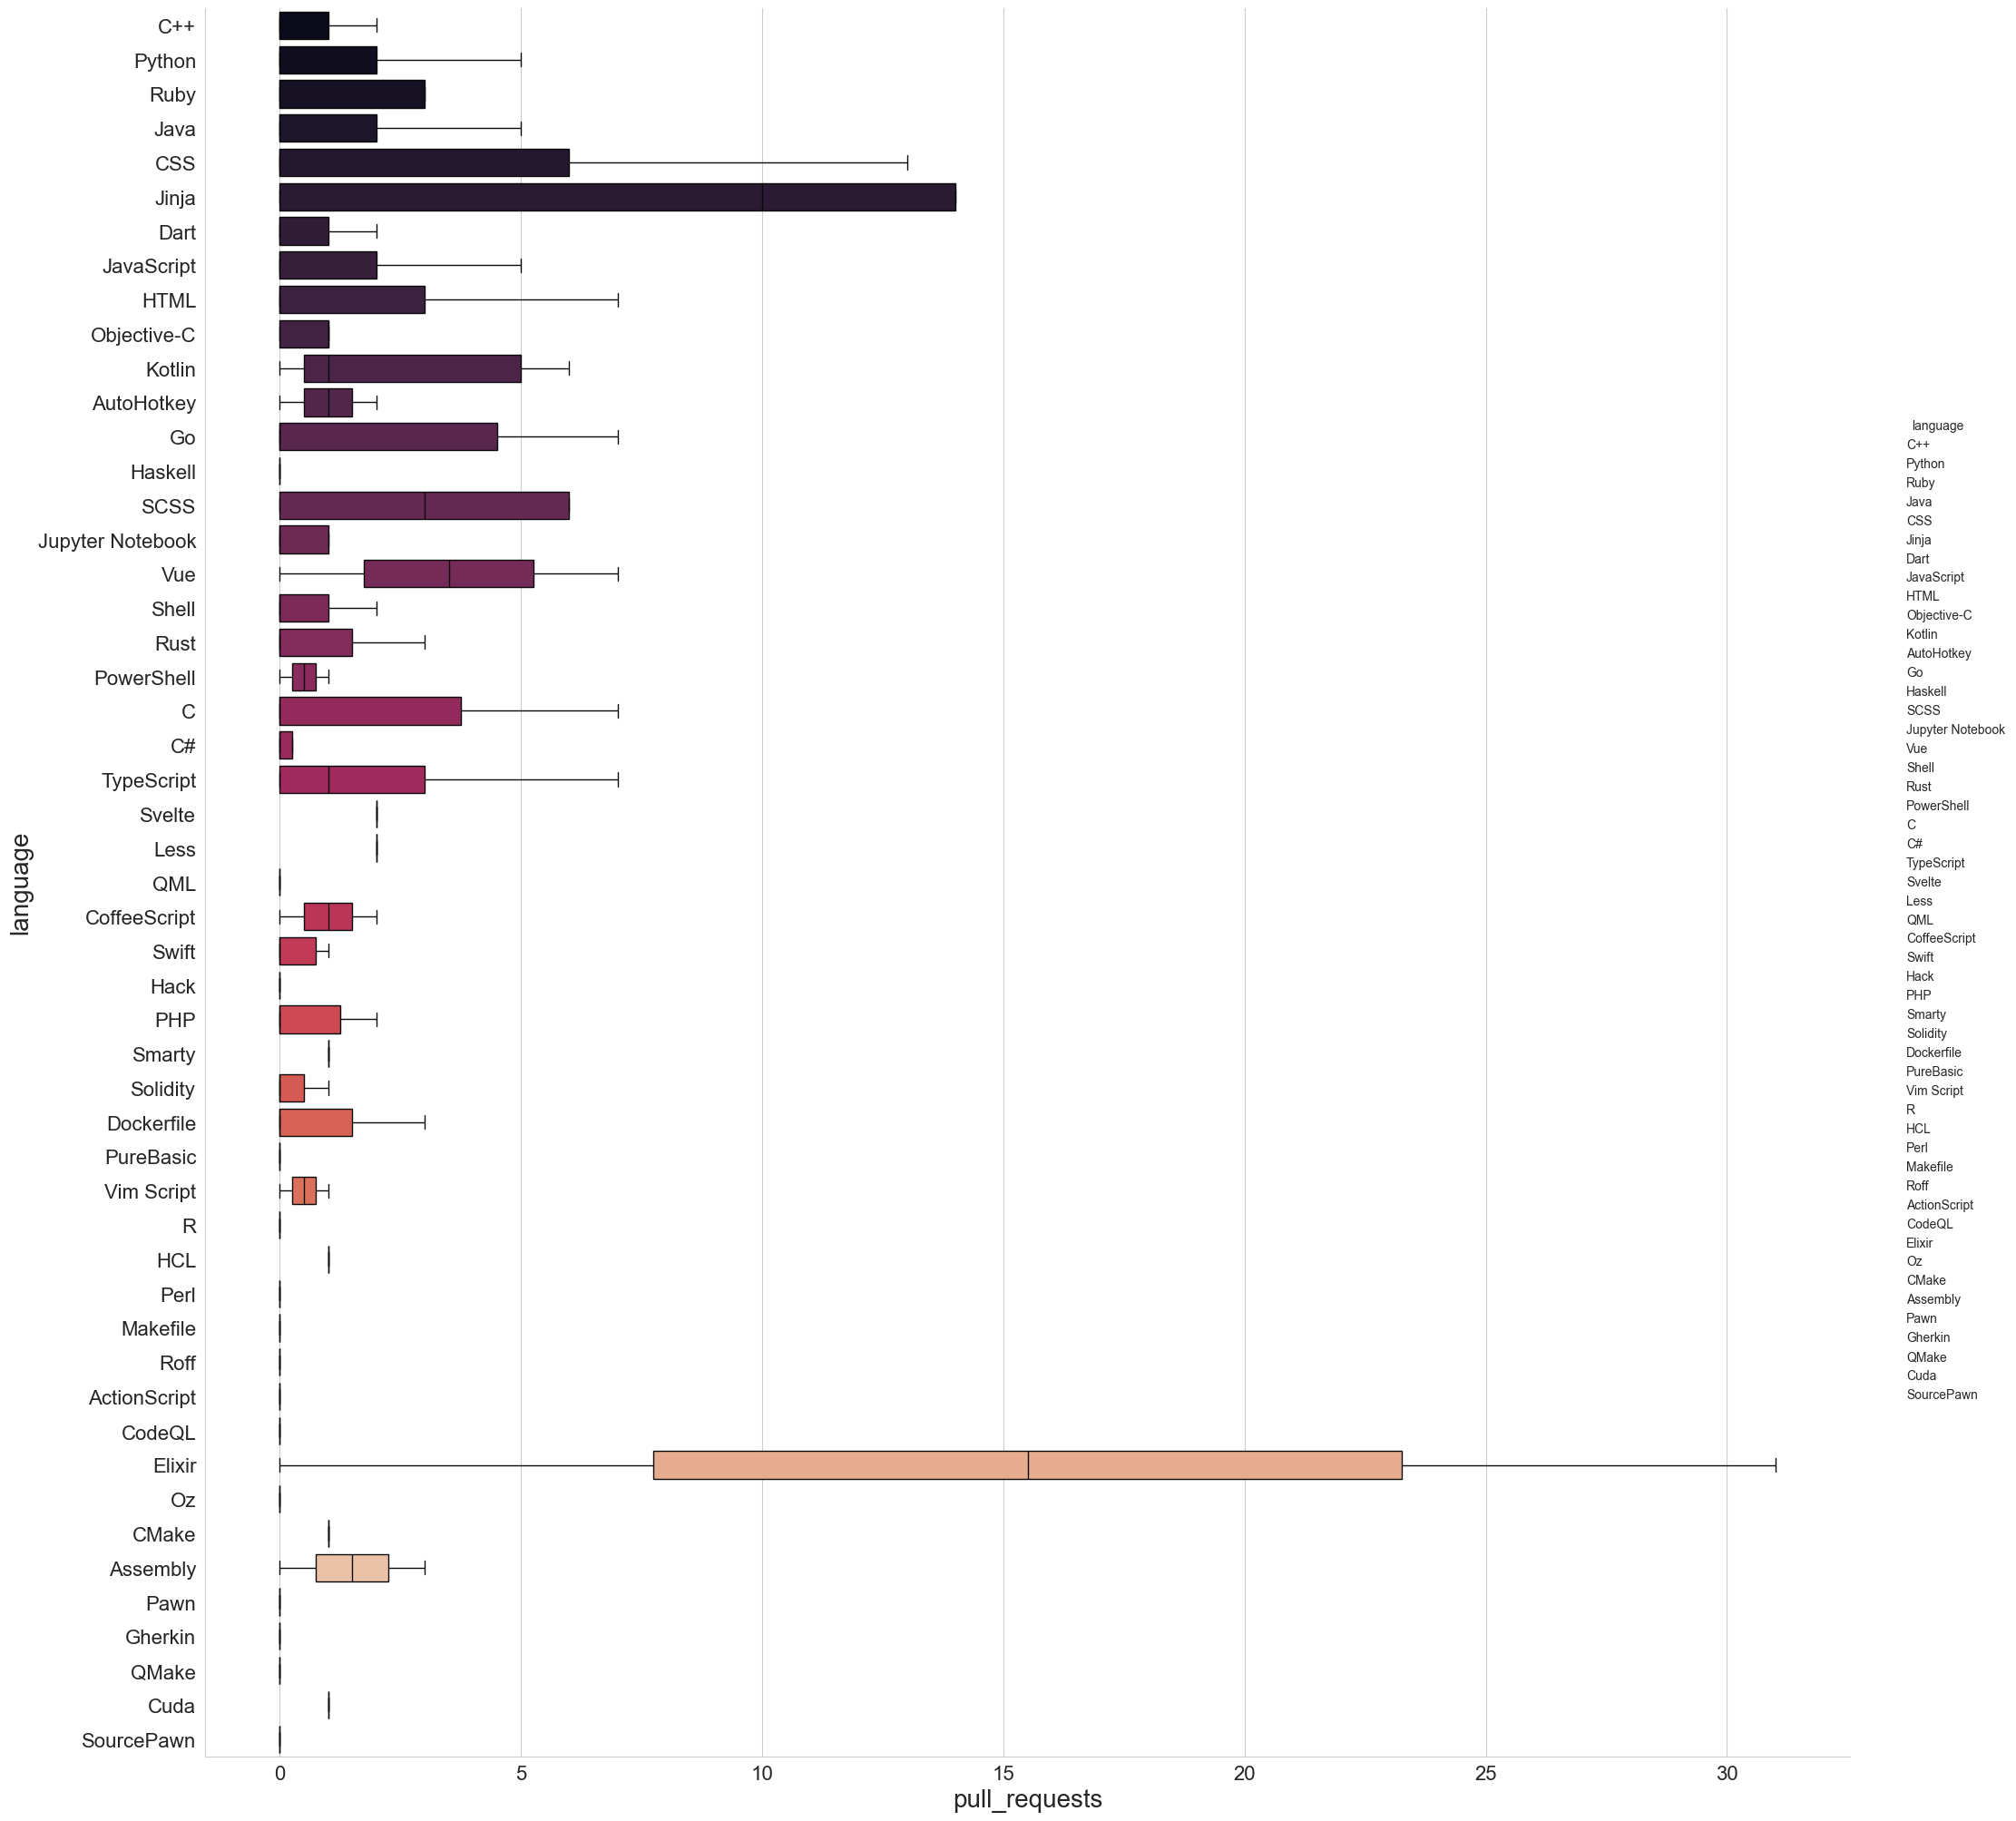

In [24]:
sns.set_style("whitegrid")
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\2410506636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket', showfliers=False)


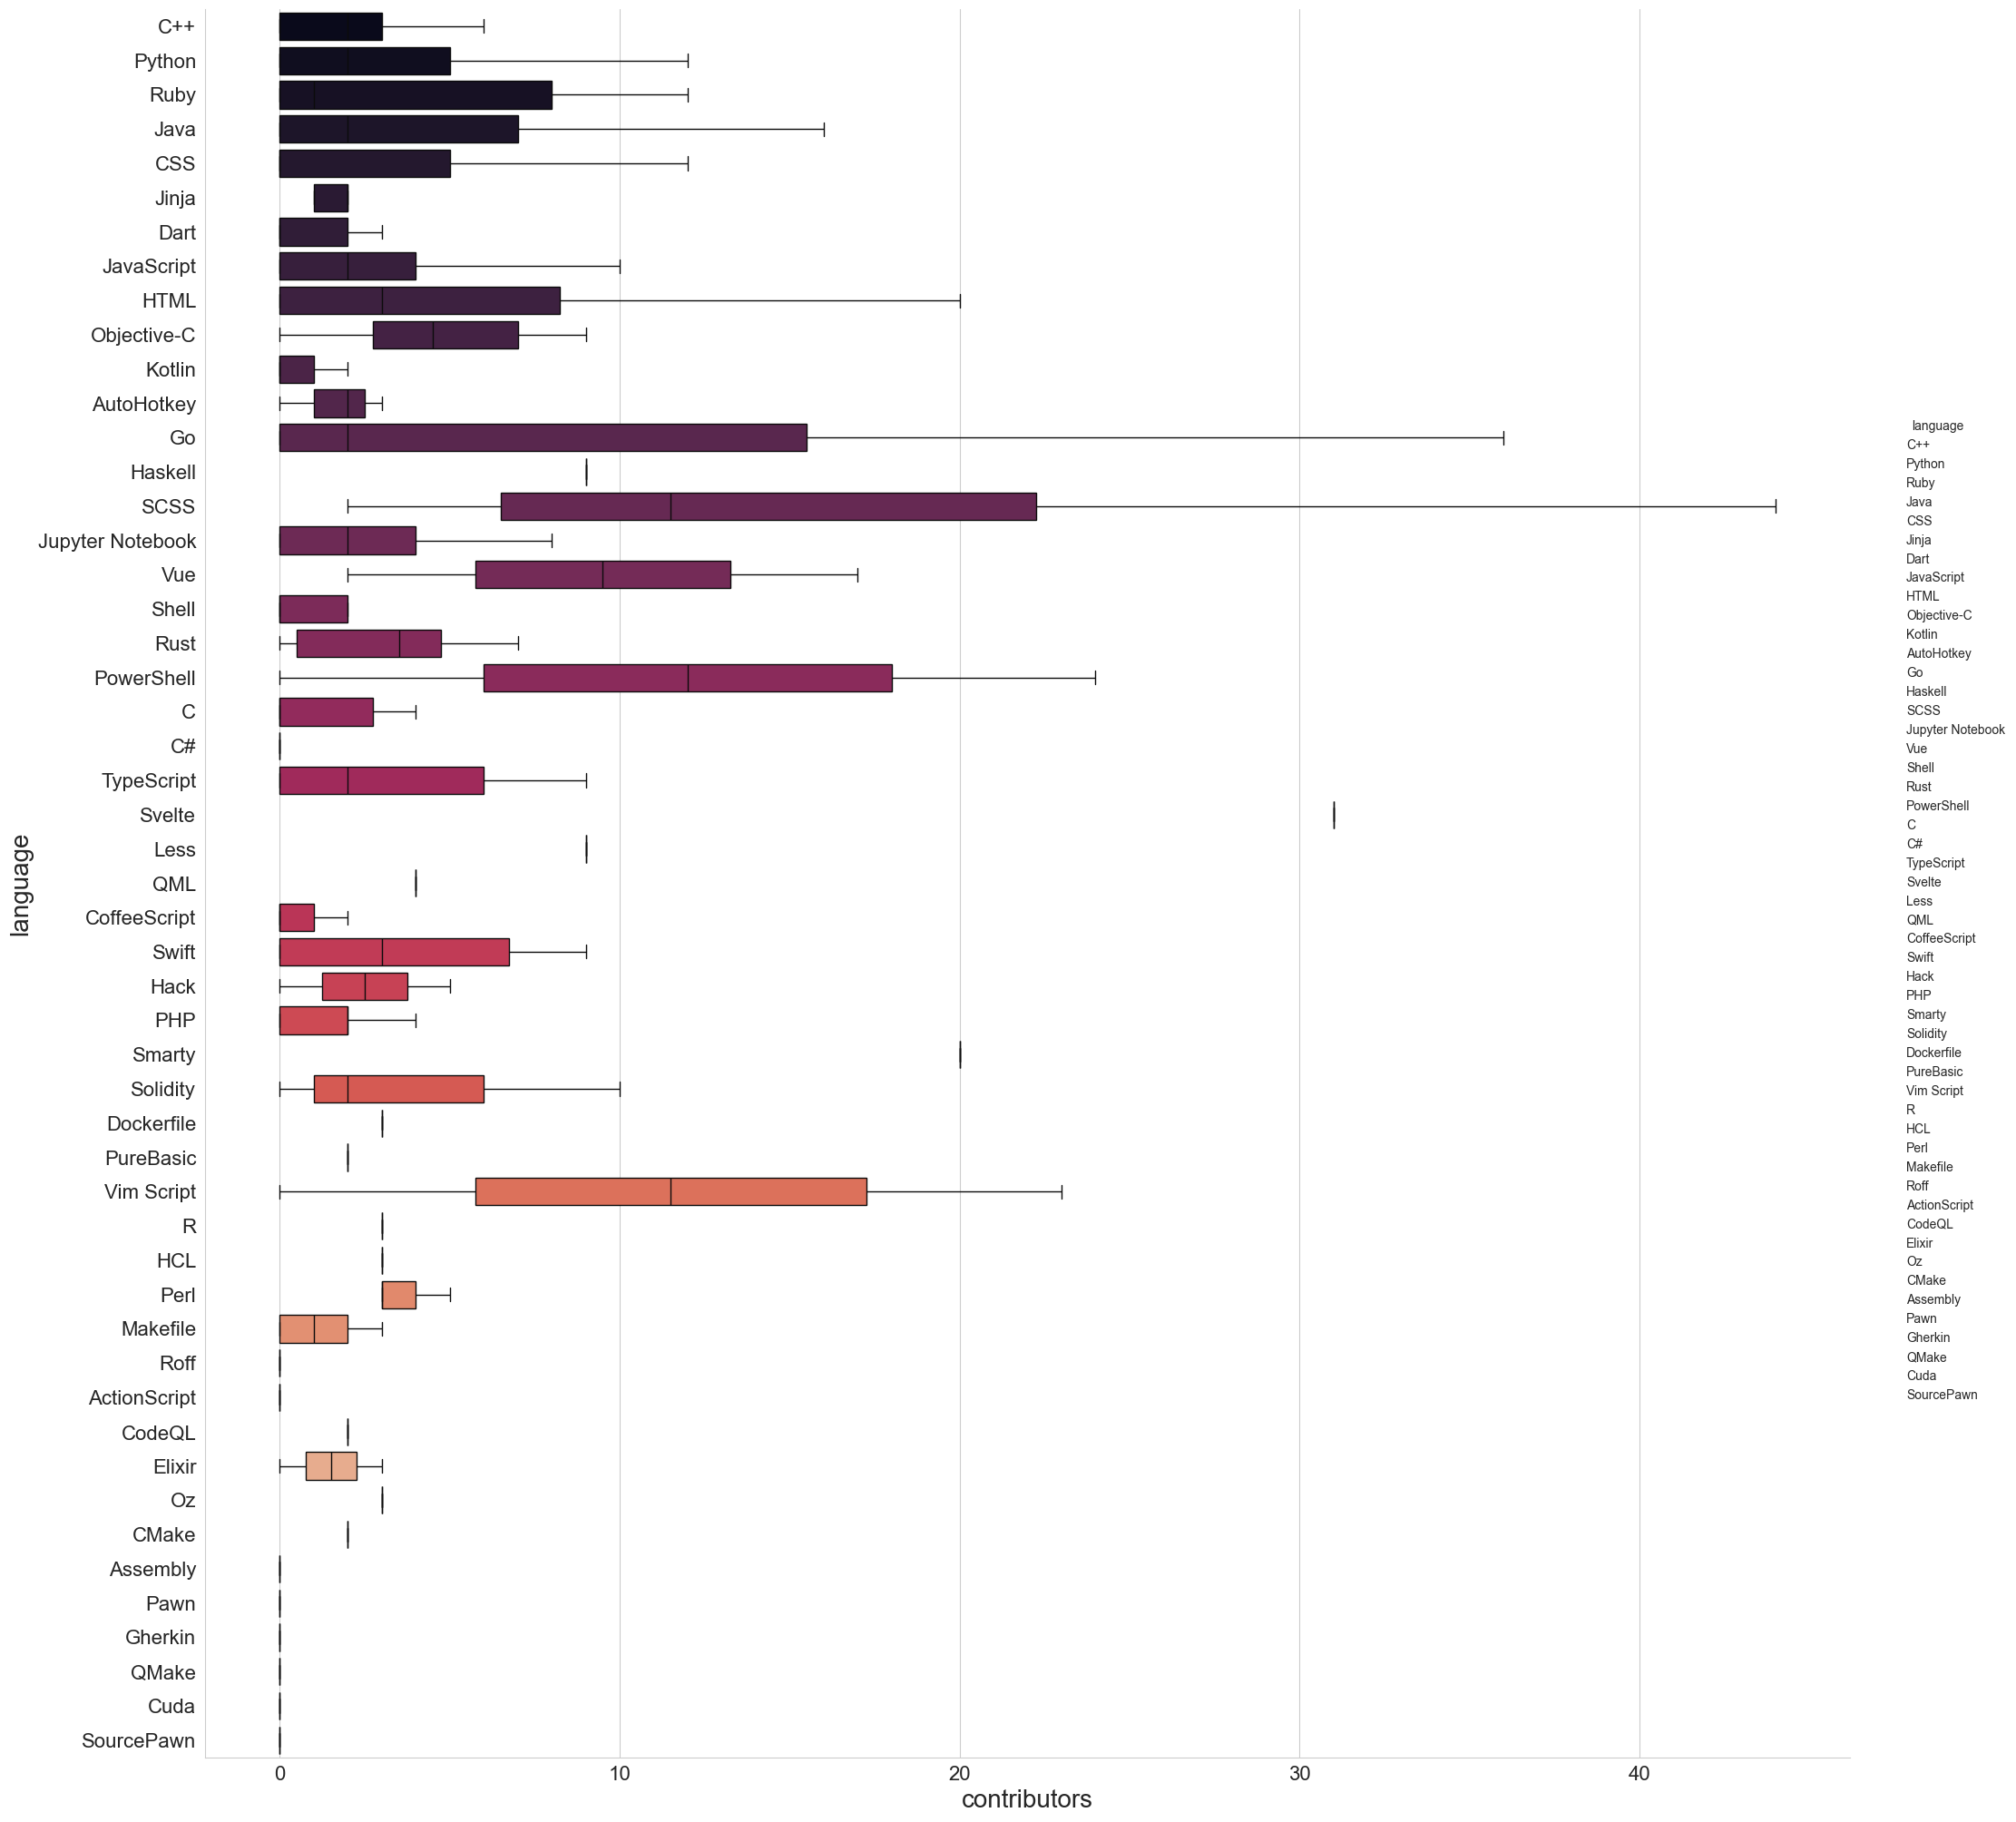

In [25]:
sns.set_style("whitegrid")
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('contributors', fontsize=20)
plt.show()

In [26]:
operation_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
1047,stars_count,2
1048,stars_count,0
1049,stars_count,0
1050,stars_count,11


In [27]:
forks_count = pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['operation', 'counts'])
operation_counts = pd.concat([operation_counts,forks_count], ignore_index=True)
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
2099,forks_count,1
2100,forks_count,0
2101,forks_count,5
2102,forks_count,5


In [28]:
operation_counts = pd.concat([operation_counts, pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['operation', 'counts'])], ignore_index=True)
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
3151,issues_count,1
3152,issues_count,1
3153,issues_count,1
3154,issues_count,1


In [29]:
operation_counts = pd.concat([operation_counts, pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['operation', 'counts'])], ignore_index=True)
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
4203,pull_requests,0
4204,pull_requests,0
4205,pull_requests,1
4206,pull_requests,0


In [30]:
operation_counts = pd.concat([operation_counts, pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['operation', 'counts'])], ignore_index=True)
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
5255,contributors,0
5256,contributors,8
5257,contributors,7
5258,contributors,0


C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\1692510892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


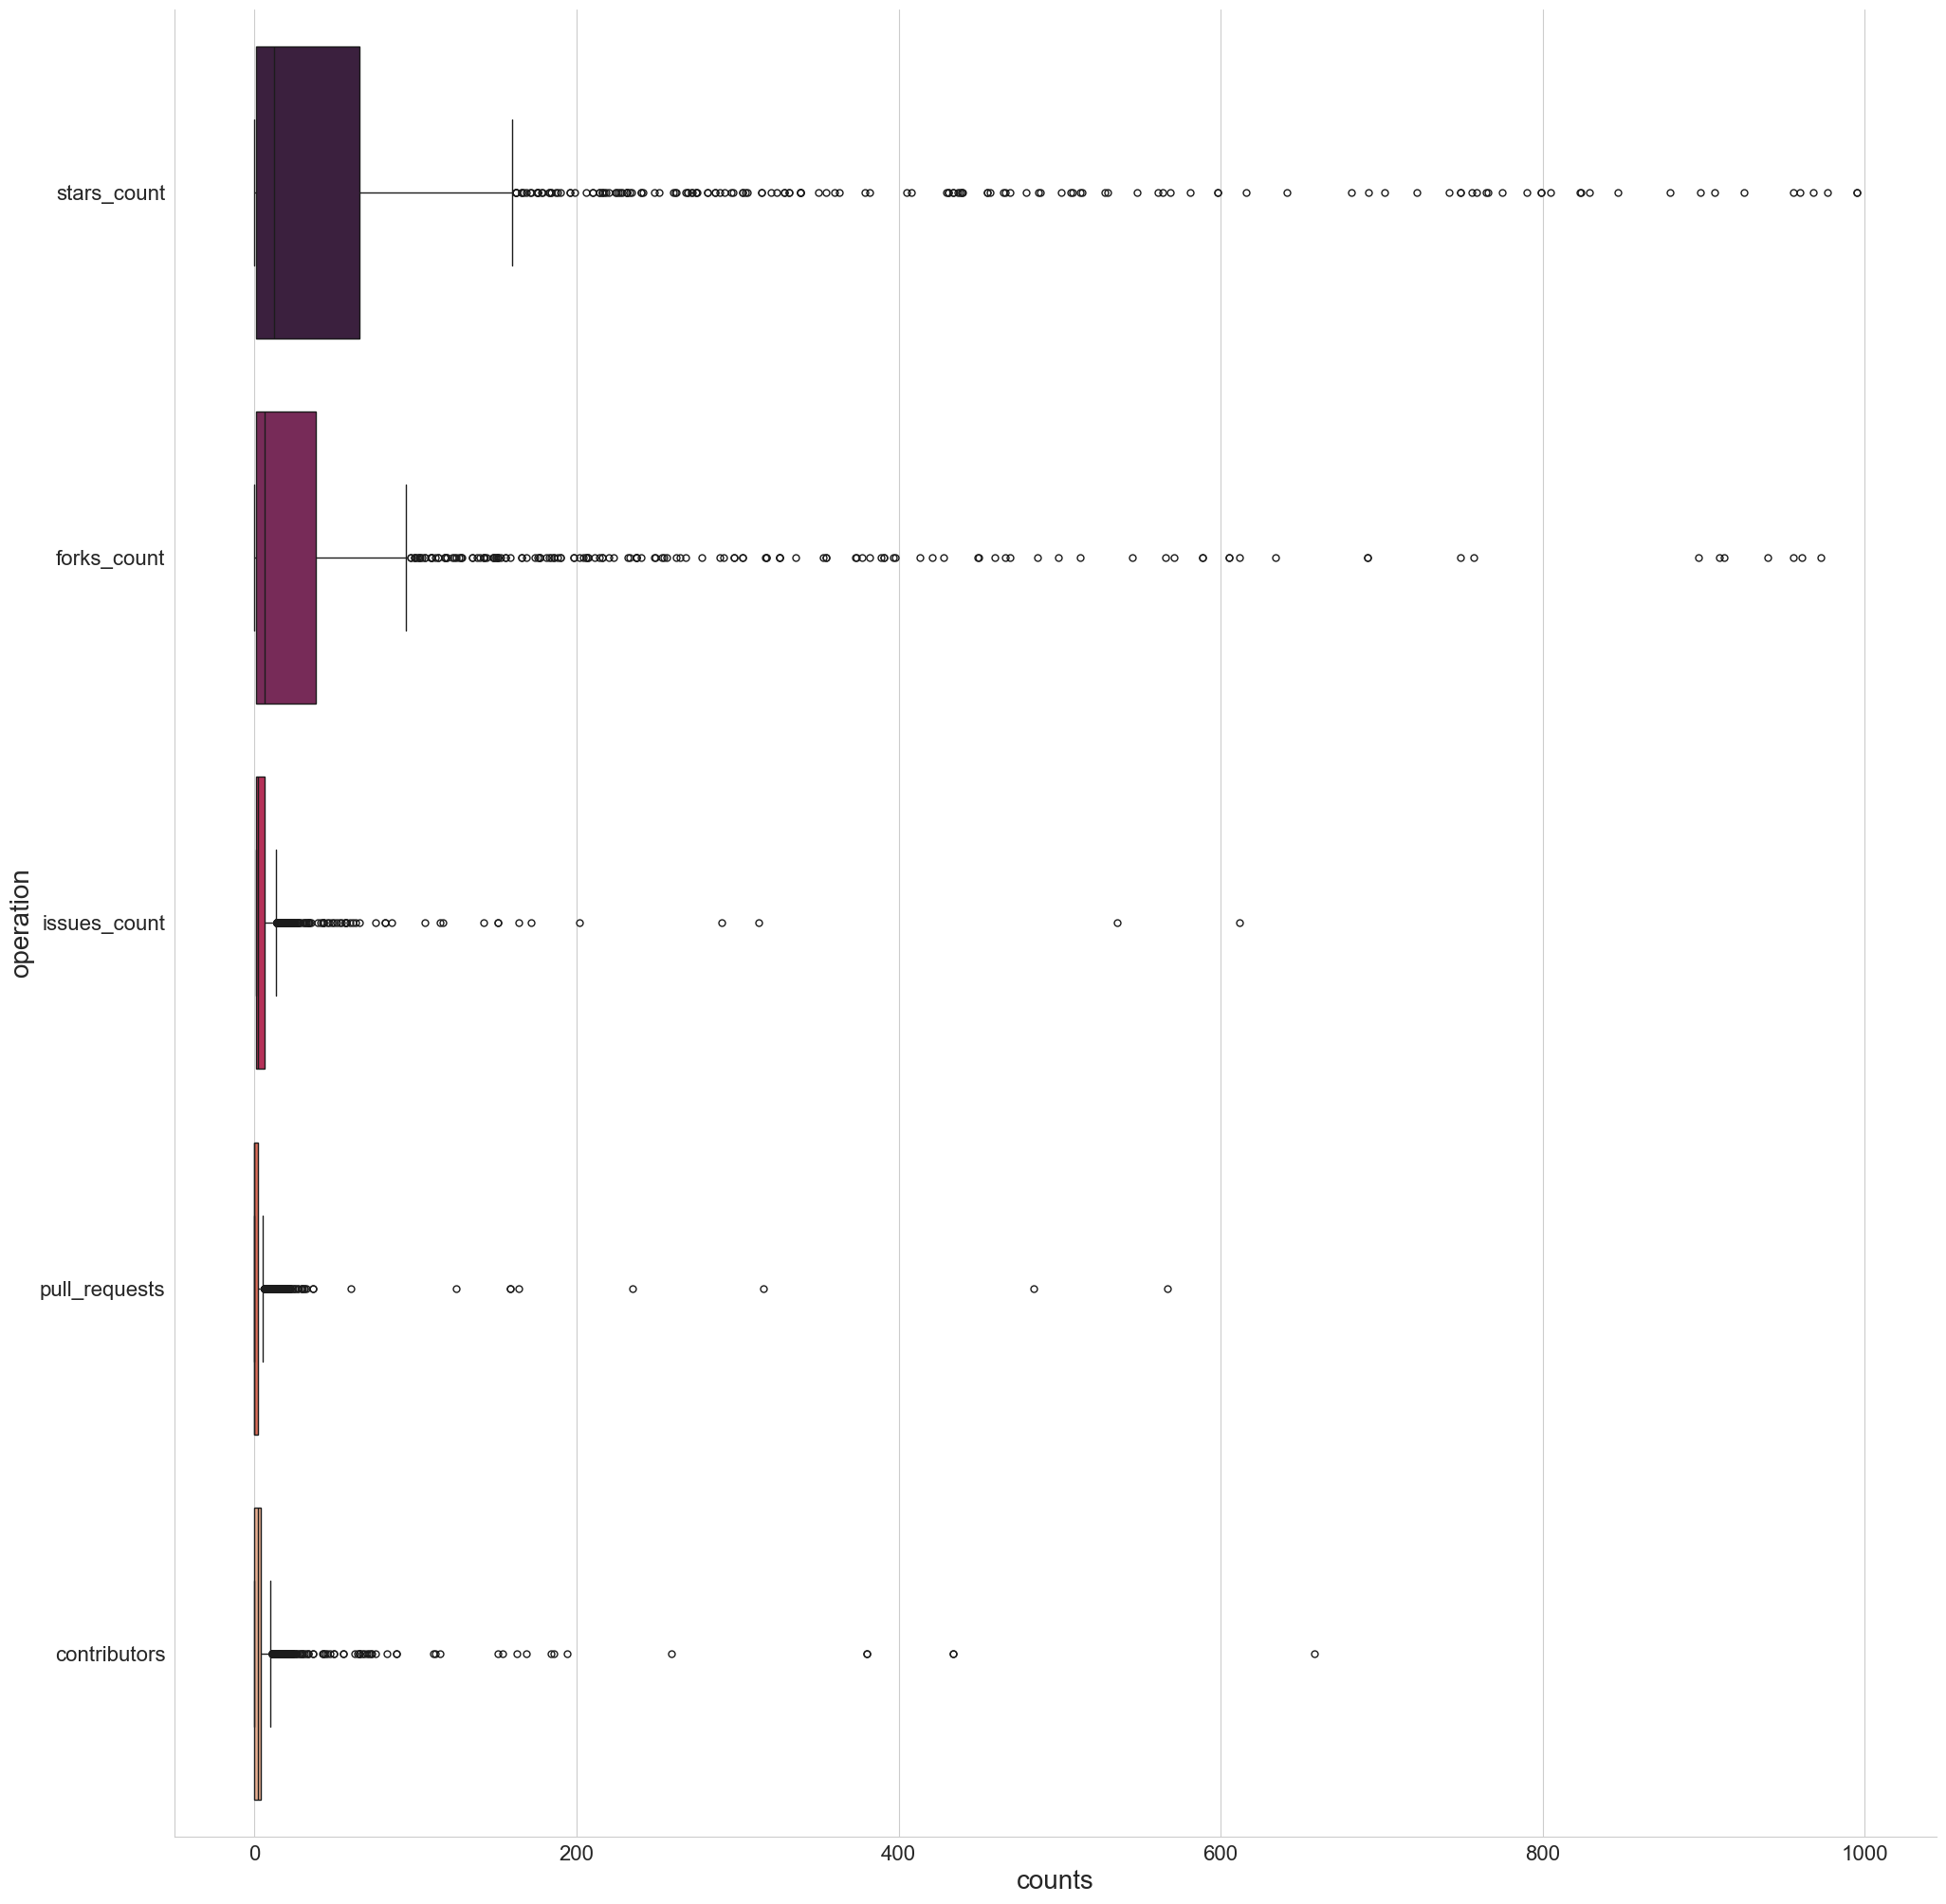

In [31]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_14004\1732511749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket', showfliers=False)


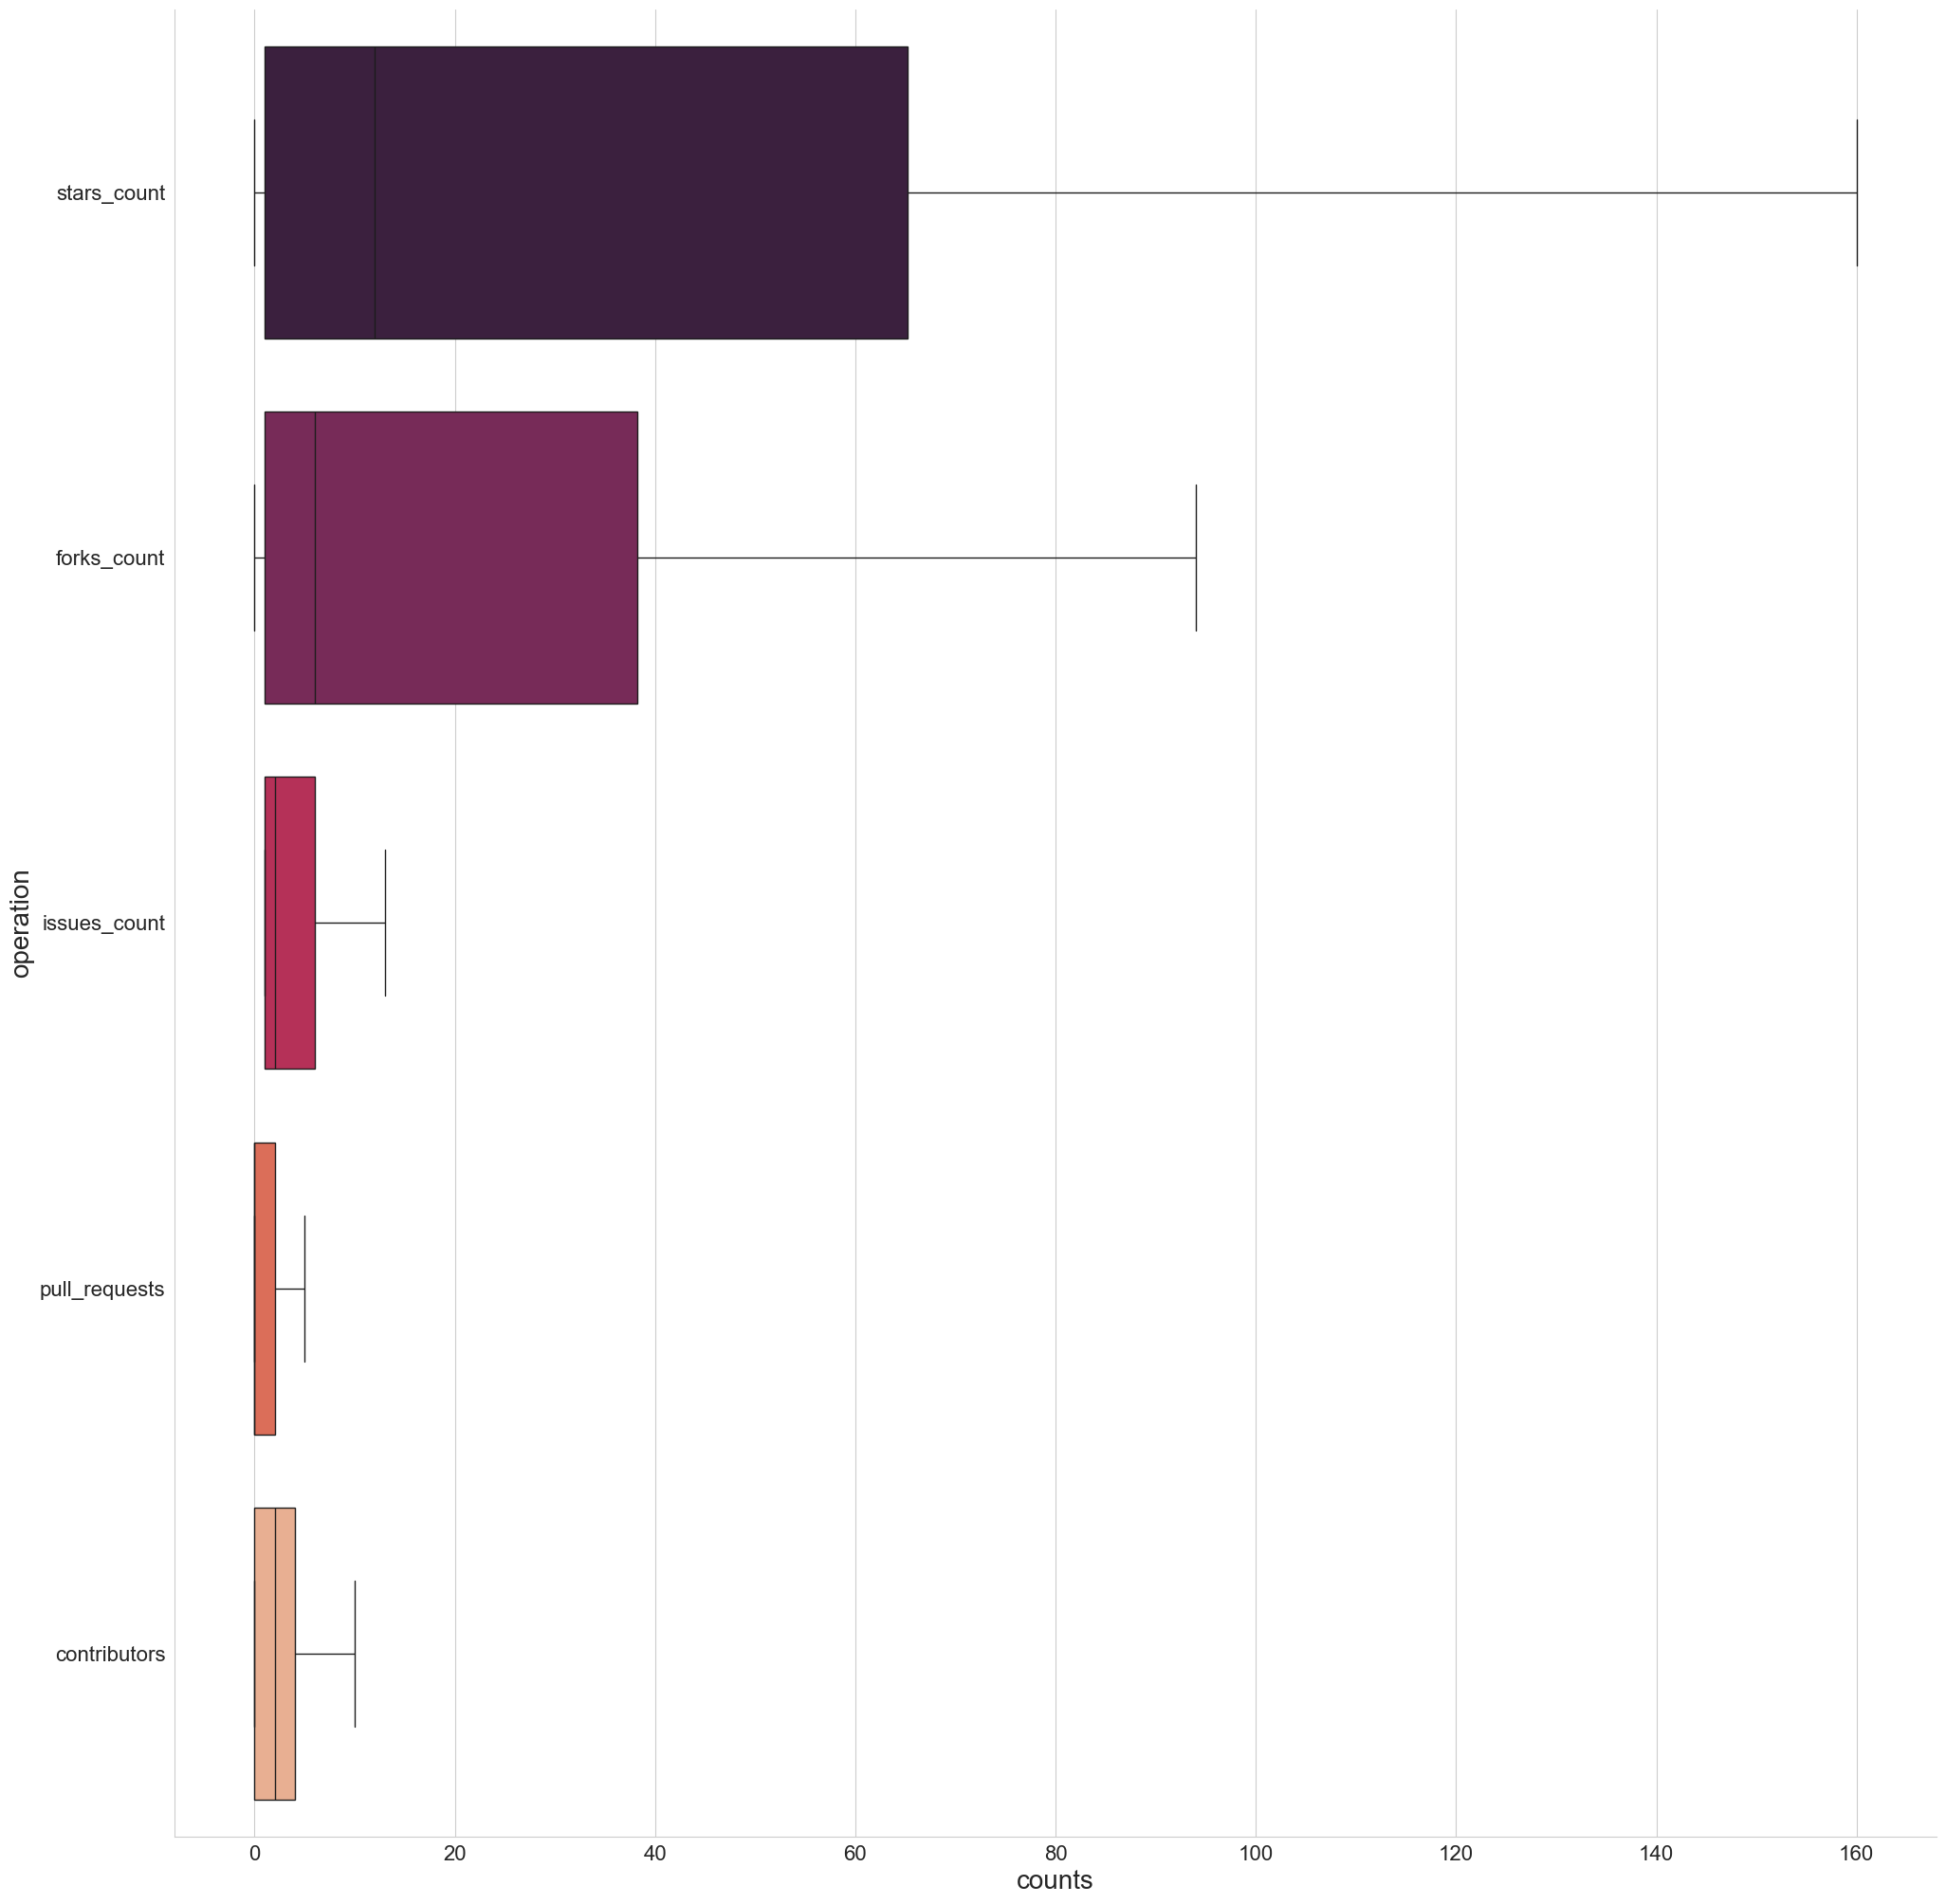

In [32]:
sns.set_style("whitegrid")
# No outliers
stars_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

## 3. Dealing With NaN

### NaN Analysis

Noticed that there are NaN only in the column `language`. Github will recognize the programming language of the project automatically. When there is not a main program, and the repository is constructed by non-code documents, such as `.md`, then the information for `language` will possibly be NaN. Some repositories, for example *EddieHubCommunity/support* , have a lot of stars/forks/issues/pull requests/contributors, but the language is empty. There is no contradiction in these situations, because these repositories are good guidance with excellent `readme.md` files.

### Delete NaN

The dataset cleaned in this way is named to be ***github_data_cleaned***.

In [33]:
from numpy import nan as NA

In [34]:
github_data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


In [35]:
# Delete rows containing NaN
github_data_cleaned = github_data.dropna()
github_data_cleaned

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


### Replace NaN with the Value of the Highest Frequency

The dataset cleaned in this way is named to be ***github_data_HF_replaced***.

In [36]:
language_HF = language_counts.index[-1]
print('{} is the language with the highest frequency.'.format(language_HF))

Vue is the language with the highest frequency.


In [37]:
github_data_HF_replaced = github_data.replace(np.nan, language_HF)
github_data_HF_replaced

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,Vue
1,EddieHubCommunity/support,271,150,536,6,71,Vue
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


According to the raw dataset, the missing data is replaced by 'JavaScript', and we now construct a new cleaned dataset ***github_data_HF_replaced***.

### Complement NaN Regarding to the Correlationships Between Attributes

The dataset cleaned in this way is named to be ***github_data_attr_corr***.

In [38]:
df_coded = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True)
df_coded.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,EddieHubCommunity/support,271,150,536,6,71,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,ethereum/aleth,0,0,313,27,154,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,localstack/localstack,0,0,290,30,434,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,education/classroom,0,589,202,22,67,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Correlation Analysis')

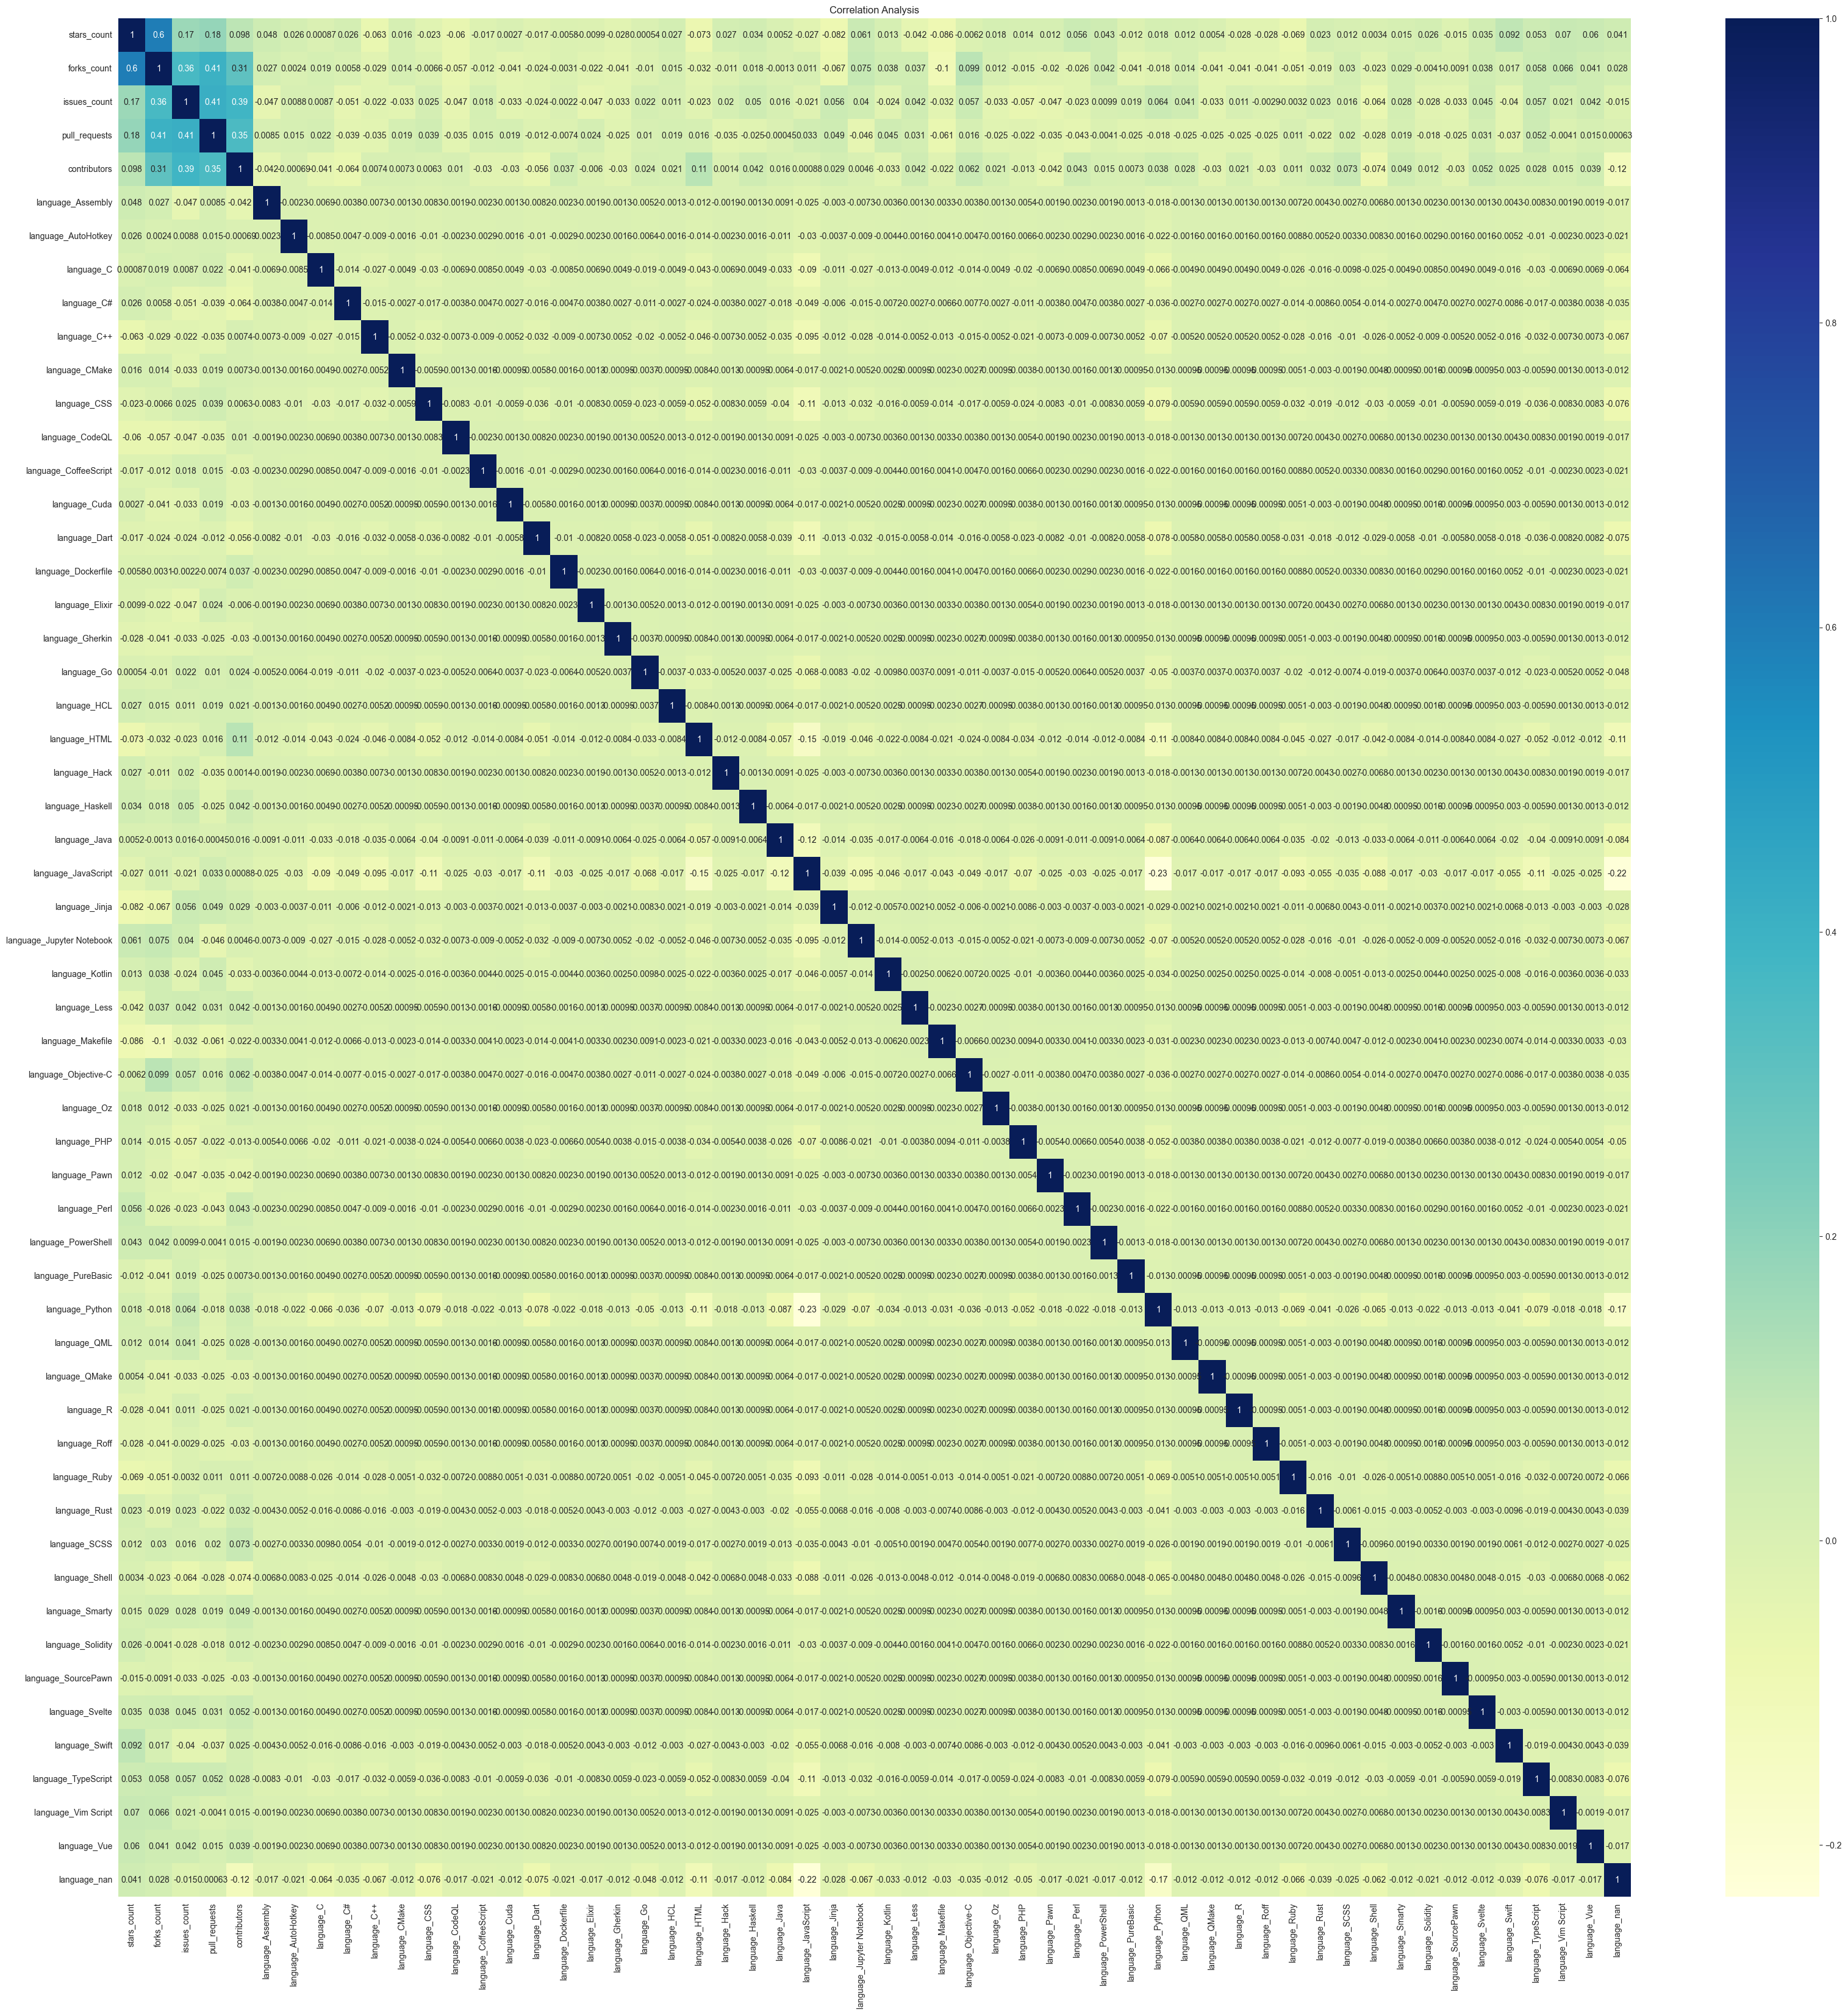

In [39]:
# 移除非数值型的 'repositories' 列（假设它是第一列）
df_numeric = df_coded.drop('repositories', axis=1)

plt.figure(figsize=(40, 40))
sns.heatmap(df_numeric.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

The correlationship between the language used in a repository and the counts (star/fork/issue/pull/contributor) is so weak, thus use correlationship to complete the missing data is not a good idea.

In [52]:
github_data_attr_corr = github_data

In [53]:
df1 = github_data_attr_corr.groupby('language').agg(avg=('stars_count', 'mean'))
df1

,avg
language,
ActionScript,3.000000
Assembly,426.000000
AutoHotkey,118.333333
C,153.076923
C#,43.250000
C++,39.172414
CMake,30.000000
CSS,49.675676
CodeQL,0.000000


In [54]:
# for i in range(len(github_data_attr_corr)):
#     if github_data_attr_corr['language'].iloc[i] is NA:
#         rate = github_data_attr_corr['stars_count'].iloc[i]
#         dist = []
#         for j in range(len(df1)):
#             dist.append(abs(df1.iloc[j]['avg']-rate))
#         idx = dist.index(min(dist))
#         github_data_attr_corr['language'].iloc[i] = df1.index[idx]
# github_data_attr_corr['language'].value_counts()

for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr['language'].iloc[i] is pd.NA:  # Ensure you're using pd.NA for missing values comparison
        rate = github_data_attr_corr['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg'] - rate))
        idx = dist.index(min(dist))
        # Use .loc to update 'language' for the row i in a way compatible with future versions of pandas
        github_data_attr_corr.loc[github_data_attr_corr.index[i], 'language'] = df1.index[idx]

github_data_attr_corr['language'].value_counts()


language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

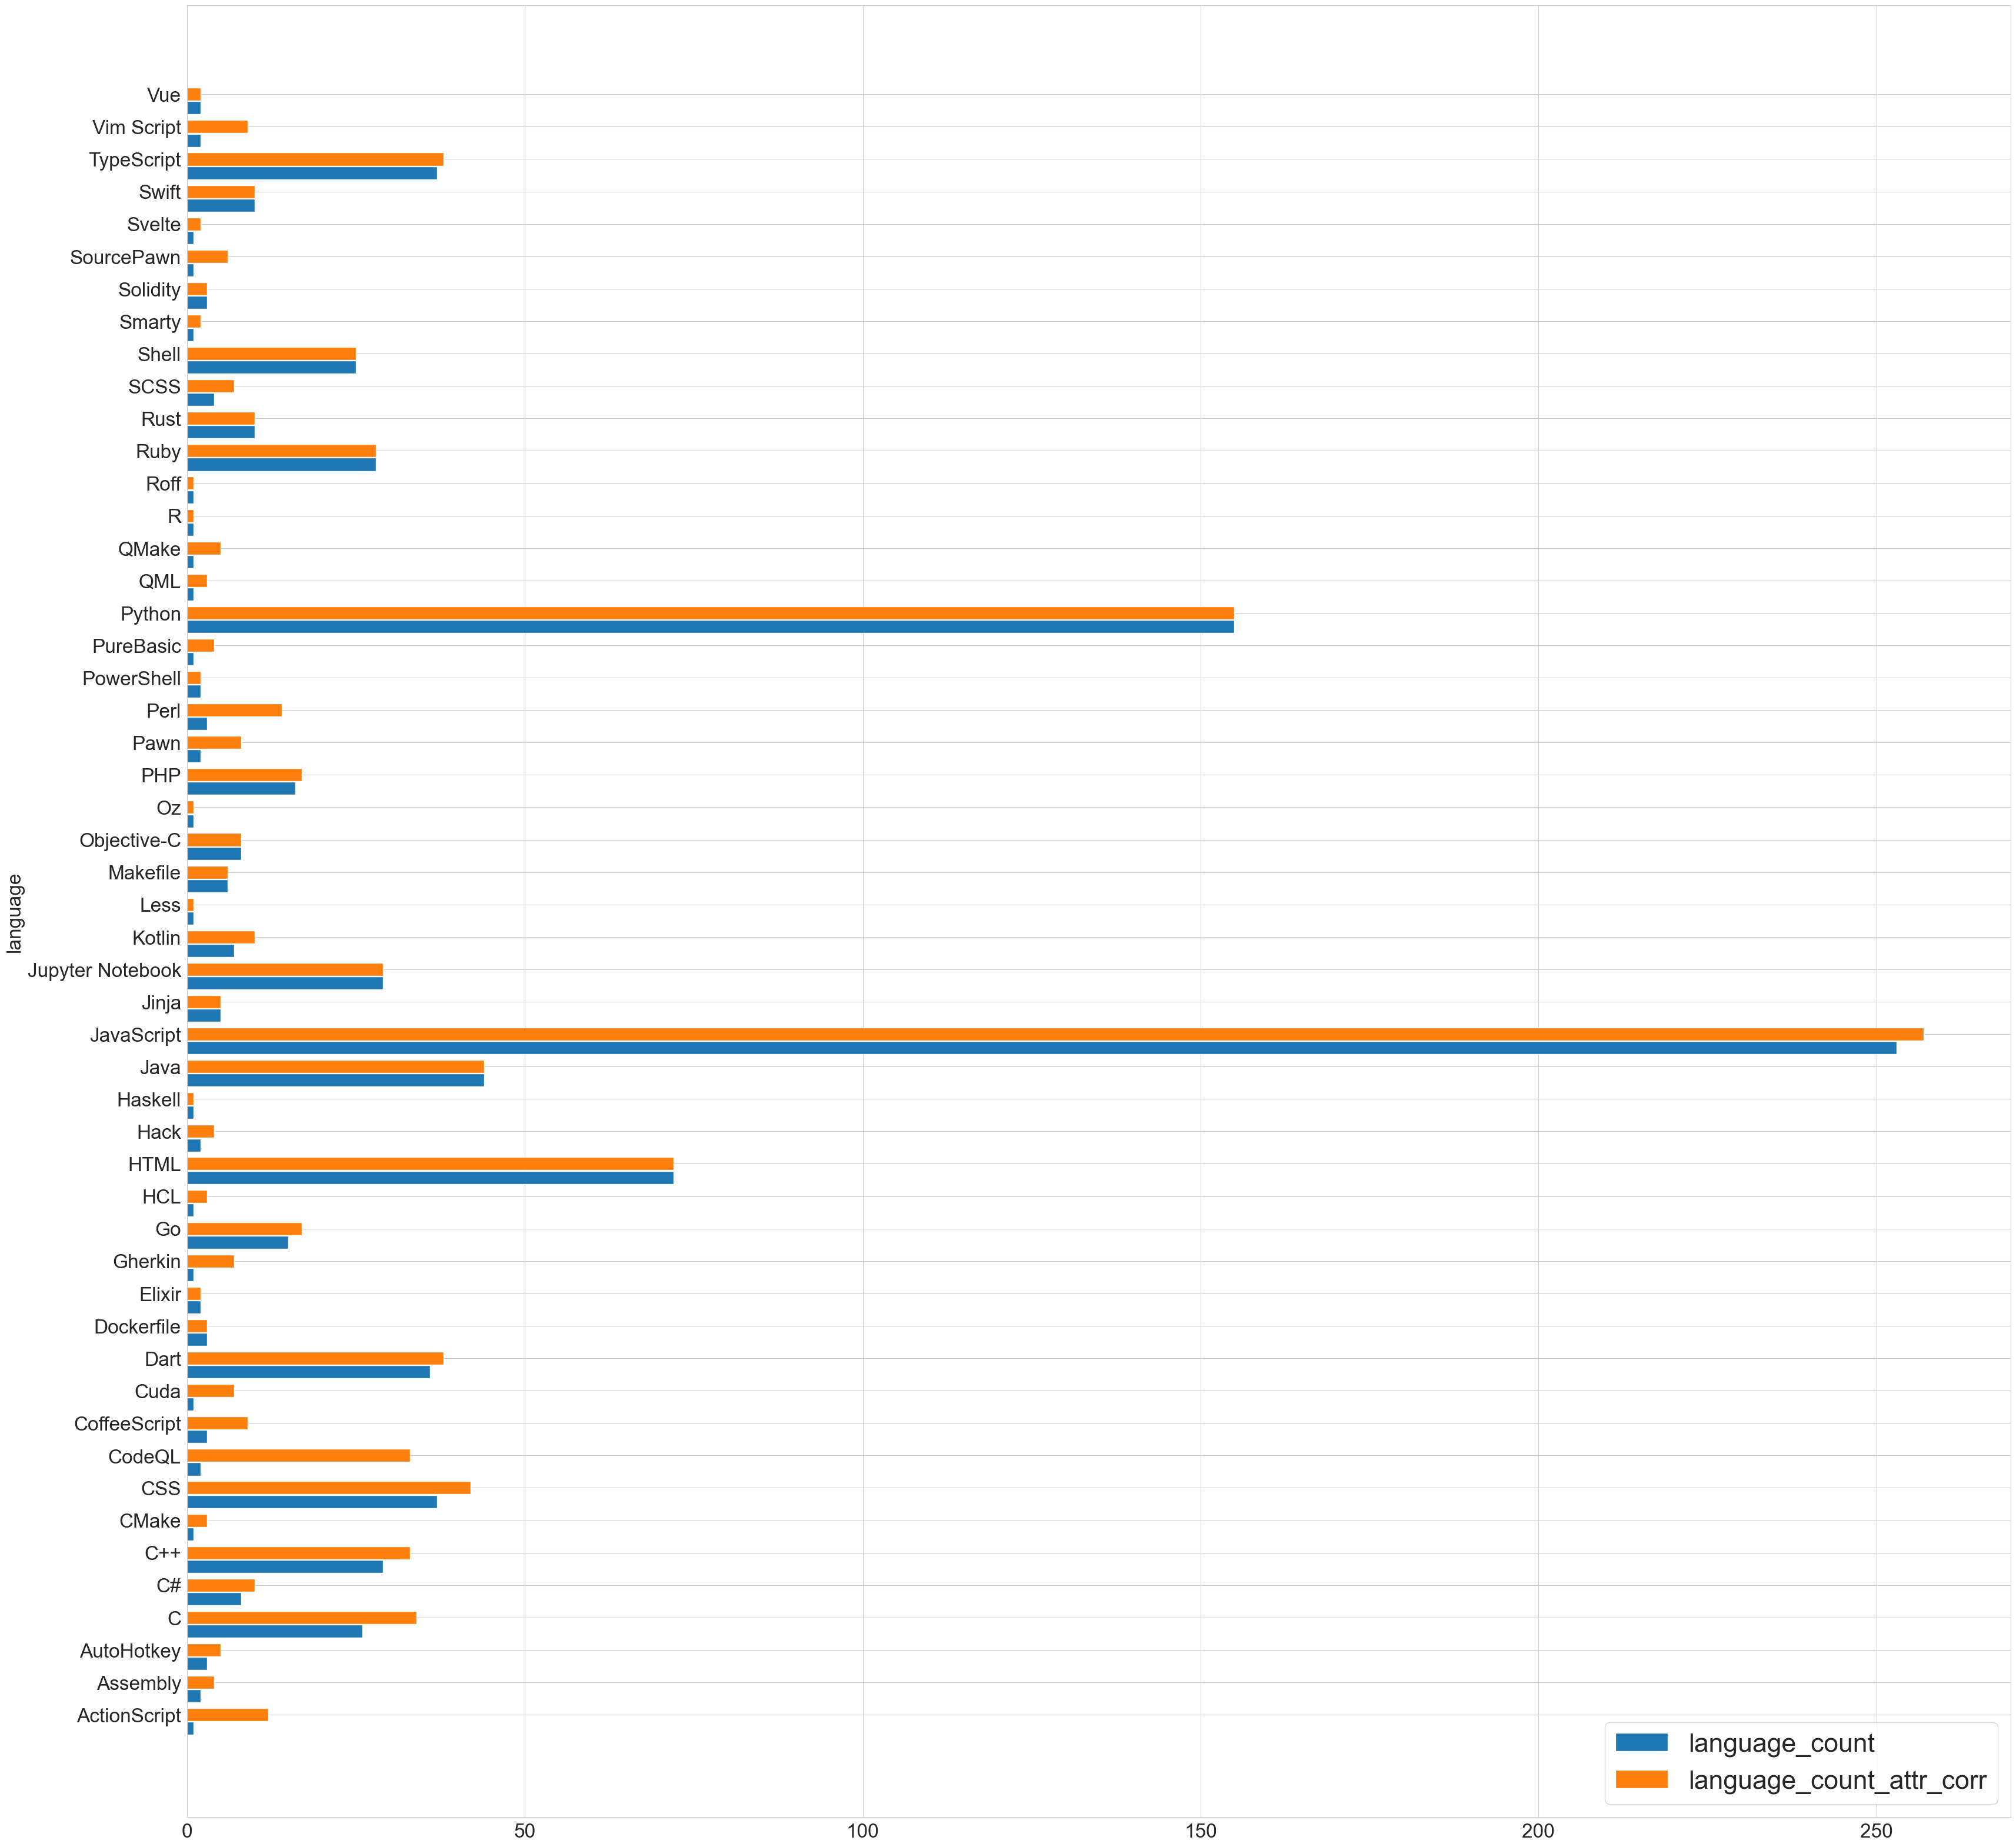

In [43]:
language_count_attr_corr = language_counts
language_count_attr_corr['language_count_attr_corr'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_attr_corr['language'].value_counts().index):
        language_count_attr_corr.loc[[level], ['language_count_attr_corr']] = github_data_attr_corr['language'].value_counts().loc[[level]].values[0]
language_count_attr_corr    

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_attr_corr))), tick_label=language_count_attr_corr.index, width=language_count_attr_corr['count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_attr_corr)))], tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count_attr_corr'], label='language_count_attr_corr', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('', fontsize=24)
# plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

This result shows that this method smooth the original distribution.

### Substitute NaN Regarding to the Correlationships Between Samples

The dataset cleaned in this way is named to be ***github_data_sample_corr***.

In [44]:
github_data_sample_corr = github_data

In [45]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [46]:
normal_github_data = regularit(github_data_sample_corr)
normal_github_data

,stars_count,forks_count,issues_count,pull_requests,contributors
0,-0.000000,-0.000000,inf,-1.258964,-0.003049
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367
...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000


In [47]:
normal_language = pd.concat([normal_github_data, github_data_sample_corr['language']], axis=1)
normal_language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,-0.000000,-0.000000,inf,-1.258964,-0.003049,CodeQL
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954,Perl
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556,C++
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500,Python
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367,Ruby
...,...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000,Dart
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308,HTML
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753,Python
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000,JavaScript


In [48]:
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)

In [49]:
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_sample_corr['language'].iloc[i] = github_data_sample_corr['language'].iloc[idx]
github_data_sample_corr['language'].value_counts()

language
JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir 

This result is quite similar to the previous method. The reason is probably that the count attributes we use here are highly correlated, so that when we use them to measure the correlationships between samples, the result does not change much.